In [1]:
import geopandas as gpd 
import pandas as pd 
import os


print(os.getcwd())

c:\Users\20191\Desktop\XGBoost_Modelling


In [2]:
BASE_PATH = './'
DATA_PATH = {
    "2022_ACCIDENT" : f"{BASE_PATH+'2022/2022_accident_deduplicated.csv'}",
    "2022_GSV_RECORDER" : f"{BASE_PATH+'2022/2022_GSV_recorder.csv'}",
    "2022_SEG_RESULT":f"{BASE_PATH+'2022/result_2022.csv'}",
    "2021_ACCIDENT" : f"{BASE_PATH+'2021/2021_accident_deduplicated.csv'}",
    "2021_GSV_RECORDER" : f"{BASE_PATH+'2021/2021_GSV_recorder.csv'}",
    "2021_SEG_RESULT":f"{BASE_PATH+'2021/result_2021.csv'}",
    "2020_ACCIDENT" : f"{BASE_PATH+'2020/2020_accident_deduplicated.csv'}",
    "2020_GSV_RECORDER" : f"{BASE_PATH+'2020/2020_GSV_recorder.csv'}",
    "2020_SEG_RESULT":f"{BASE_PATH+'2020/result_2020.csv'}",
    "MSOA":f"{BASE_PATH+'MSOA.geojson'}"
}

In [43]:
boundary = gpd.read_file(DATA_PATH['MSOA'])
# accident table
accident_location_2022 = pd.read_csv(DATA_PATH['2022_ACCIDENT'])[[
    '_Collision Id',  'Easting', 'Northing','Driver Age'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res_2022 = pd.read_csv(DATA_PATH['2022_SEG_RESULT'])[[
    "GSV_ID", 'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening',
    'Road', 'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass',
    'Sky', 'Nature'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder_2022 = pd.read_csv(DATA_PATH['2022_GSV_RECORDER'])[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder_2022 = GSV_recorder_2022[GSV_recorder_2022['GSV_ID'] != '0']

# 2021
# accident table
accident_location_2021 = pd.read_csv(DATA_PATH['2021_ACCIDENT'])[[
    '_Collision Id', 'Easting', 'Northing', 'Driver Age'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res_2021 = pd.read_csv(DATA_PATH['2021_SEG_RESULT'])[[
    "GSV_ID", 'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening',
    'Road', 'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass',
    'Sky', 'Nature'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder_2021 = pd.read_csv(DATA_PATH['2021_GSV_RECORDER'])[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder_2021 = GSV_recorder_2021[GSV_recorder_2021['GSV_ID'] != '0']

# 2020
# accident table
accident_location_2020 = pd.read_csv(DATA_PATH['2020_ACCIDENT'])[[
    '_Collision Id', 'Easting', 'Northing', 'Driver Age'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res_2020 = pd.read_csv(DATA_PATH['2020_SEG_RESULT'])[[
    "GSV_ID", 'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening',
    'Road', 'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass',
    'Sky', 'Nature'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder_2020 = pd.read_csv(DATA_PATH['2020_GSV_RECORDER'])[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder_2020 = GSV_recorder_2020[GSV_recorder_2020['GSV_ID'] != '0']

In [39]:
MSOA = boundary[['MSOA11CD', 'MSOA11NM', 'geometry']]
MSOA

MSOA11CD                  MSOA11NM  \
0    E02000001        City of London 001   
1    E02000002  Barking and Dagenham 001   
2    E02000003  Barking and Dagenham 002   
3    E02000004  Barking and Dagenham 003   
4    E02000005  Barking and Dagenham 004   
..         ...                       ...   
978  E02006927             Greenwich 034   
979  E02006928             Greenwich 035   
980  E02006929             Greenwich 036   
981  E02006930             Greenwich 037   
982  E02006931             Greenwich 038   

                                              geometry  
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  
1    MULTIPOLYGON (((548881.563 190845.265, 548881....  
2    MULTIPOLYGON (((549102.438 189324.625, 548954....  
3    MULTIPOLYGON (((551549.998 187364.637, 551478....  
4    MULTIPOLYGON (((549099.634 187656.076, 549161....  
..                                                 ...  
978  MULTIPOLYGON (((541029.881 176265.023, 541101....  
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980  MULTIPOLYGON (((540054.366 179353.136, 540220....  
981  MULTIPOLYGON (((539552.478 178604.042, 539533....  
982  MULTIPOLYGON (((538834.754 177736.770, 538880....  

[983 rows x 3 columns]

In [47]:
accident_location_elderly_2022 = accident_location_2022[
    accident_location_2022['Driver Age'] >= 65]
accident_location_elderly_2021 = accident_location_2021[
    accident_location_2021['Driver Age'] >= 65]
accident_location_elderly_2020 = accident_location_2020[
    accident_location_2020['Driver Age'] >= 65]
accident_location_elderly_2020

Easting  Northing  Driver Age
_Collision Id                               
1200240171      531188    181609          70
1200282469      531362    181576          72
48200947552     533041    181158          71
48200968720     533168    181570          77
48200992273     532585    180787          72
...                ...       ...         ...
1200281198      534973    192272          69
1200281709      531138    197908          68
1200282421      533171    196968          82
1200282428      530490    192366          65
1200282531      534126    192527          71

[507 rows x 3 columns]

In [49]:
total_elderly = pd.concat([accident_location_elderly_2020,accident_location_elderly_2021,accident_location_elderly_2022])
total_elderly

Easting  Northing  Driver Age
_Collision Id                               
1200240171      531188    181609          70
1200282469      531362    181576          72
48200947552     533041    181158          71
48200968720     533168    181570          77
48200992273     532585    180787          72
...                ...       ...         ...
1220419113      511364    172981          66
1220419136      545340    187889          69
1220425198      524881    180770          70
48221271870     531383    181174          78
48221271938     533026    180680          72

[1805 rows x 3 columns]

In [60]:
recorder_total = pd.concat([GSV_recorder_2020,GSV_recorder_2021,GSV_recorder_2022])
recorder_total

GSV_ID
_Collision Id                                                   
1200240171                                vkXigtL2L3iwipGmKsHFpQ
1200257426     CAoSLEFGMVFpcFA0eEZWVUJHWWs4Y1hsWnM5UDdLUEl0RE...
1200268129                                SjZ-sgwePgHbU1uM9RpoZA
1200280437                                NS1NYUyAgpi8yB19cwca1w
1200282469                                oxZqqE3v_ui6HXrQ-JV9Xg
...                                                          ...
48221290750    CAoSLEFGMVFpcE9VWlppYXVIamFIeWtXTEh6d1QwVE9Pc0...
48221290761                               GQrRkoMBvRRyrsOuEcA0-Q
48221291921                               TC-DhItdWOk3PwYmTScaag
48221292373    CAoSLEFGMVFpcE01RWM2Um1iZnBIcE5fXzFRUHZwS2c1SX...
48221292435                               vA87ZpcsL0NpVVn5_PZdLw

[24880 rows x 1 columns]

In [67]:
seg_res_total = pd.concat([seg_res_2020,seg_res_2021,seg_res_2022]).reset_index().drop_duplicates(['GSV_ID']).set_index(['GSV_ID'])
seg_res_total

Person  Bike  HeavyV  LightV  Facade  WindowOpening  \
GSV_ID                                                                        
WgoXuTYYlCn0xWGIFE5sZQ     0.0  0.00    0.00    0.03    0.21            0.0   
iCIUU93iqggsqj1tf-Hy0A     0.0  0.00    0.00    0.06    0.62            0.0   
Ix1e7mGK1-NMTO2aLZNfKw     0.0  0.00    0.00    0.01    0.15            0.0   
DTXmEYQz3B-kRLh2OuYqAw     0.0  0.00    0.00    0.03    0.19            0.0   
HSAvNpINJXVx-SFsrKFsoA     0.0  0.00    0.00    0.04    0.37            0.0   
...                        ...   ...     ...     ...     ...            ...   
STe6_hUjOFDzQORWpXPcNw     0.0  0.00    0.00    0.06    0.34            0.0   
cnXSdgCq6Y0rwaECe90UXA     0.0  0.00    0.00    0.07    0.40            0.0   
bCTf_YWtIn9Zv9VIwTHutg     0.0  0.01    0.00    0.02    0.37            0.0   
5EUsWt-OwvpvAJMmHZXJQg     0.0  0.00    0.00    0.06    0.24            0.0   
t5yZehQsla_AO8j5kcfR8Q     0.0  0.00    0.03    0.05    0.21            0.0   

                        Road  Sidewalk  StreetFurniture  GreeneryTree  \
GSV_ID                                                                  
WgoXuTYYlCn0xWGIFE5sZQ  0.25      0.04             0.01          0.10   
iCIUU93iqggsqj1tf-Hy0A  0.18      0.04             0.01          0.00   
Ix1e7mGK1-NMTO2aLZNfKw  0.24      0.05             0.00          0.13   
DTXmEYQz3B-kRLh2OuYqAw  0.14      0.10             0.00          0.16   
HSAvNpINJXVx-SFsrKFsoA  0.29      0.05             0.00          0.02   
...                      ...       ...              ...           ...   
STe6_hUjOFDzQORWpXPcNw  0.16      0.08             0.01          0.12   
cnXSdgCq6Y0rwaECe90UXA  0.24      0.07             0.00          0.02   
bCTf_YWtIn9Zv9VIwTHutg  0.23      0.11             0.01          0.10   
5EUsWt-OwvpvAJMmHZXJQg  0.13      0.02             0.00          0.09   
t5yZehQsla_AO8j5kcfR8Q  0.30      0.00             0.00          0.00   

                        GreeneryGrass   Sky  Nature  
GSV_ID                                               
WgoXuTYYlCn0xWGIFE5sZQ           0.09  0.24     0.0  
iCIUU93iqggsqj1tf-Hy0A           0.00  0.05     0.0  
Ix1e7mGK1-NMTO2aLZNfKw           0.09  0.30     0.0  
DTXmEYQz3B-kRLh2OuYqAw           0.19  0.14     0.0  
HSAvNpINJXVx-SFsrKFsoA           0.00  0.21     0.0  
...                               ...   ...     ...  
STe6_hUjOFDzQORWpXPcNw           0.12  0.08     0.0  
cnXSdgCq6Y0rwaECe90UXA           0.02  0.16     0.0  
bCTf_YWtIn9Zv9VIwTHutg           0.00  0.13     0.0  
5EUsWt-OwvpvAJMmHZXJQg           0.06  0.20     0.0  
t5yZehQsla_AO8j5kcfR8Q           0.00  0.34     0.0  

[23168 rows x 13 columns]

In [68]:
# merge table
final_result = pd.merge(total_elderly,
                        pd.merge(recorder_total,
                                 seg_res_total,
                                 left_on='GSV_ID',
                                 right_index=True),
                        left_index=True,
                        right_index=True)
final_result['geometry'] = gpd.points_from_xy(final_result['Easting'],
                                              final_result['Northing'])
final_result_gdf = gpd.GeoDataFrame(final_result, crs="epsg:27700")
final_result_gdf

Easting  Northing  Driver Age  \
_Collision Id                                  
1200240171      531188    181609          70   
1200282469      531362    181576          72   
48200947552     533041    181158          71   
48200968720     533168    181570          77   
48200992273     532585    180787          72   
...                ...       ...         ...   
1220419113      511364    172981          66   
1220419136      545340    187889          69   
1220425198      524881    180770          70   
48221271870     531383    181174          78   
48221271938     533026    180680          72   

                                                          GSV_ID  Person  \
_Collision Id                                                              
1200240171                                vkXigtL2L3iwipGmKsHFpQ    0.00   
1200282469                                oxZqqE3v_ui6HXrQ-JV9Xg    0.01   
48200947552                               _x9wEe6x6VqGXI6TGvQd0g    0.12   
48200968720                               ni7nGDWAZveh1LXvMuaYww    0.00   
48200992273                               BcHb52A3Xpc4zuRIjIVxew    0.01   
...                                                          ...     ...   
1220419113                                B2GG0Q0r-RxiXt3RMjQ0Wg    0.00   
1220419136                                8cBrRzeDMyrQT4s-k70JzA    0.00   
1220425198                                TUJx3j5KRLxiU3ddYvyhqg    0.01   
48221271870                               cFZlZzEJaRfIjpfHz4DrEw    0.02   
48221271938    CAoSLEFGMVFpcFBBR25KX1ZFT2N2RjlEYTVFNUtYSkpvcn...    0.01   

               Bike  HeavyV  LightV  Facade  WindowOpening  Road  Sidewalk  \
_Collision Id                                                                
1200240171     0.00     0.0    0.04    0.50           0.00  0.21      0.11   
1200282469     0.02     0.0    0.08    0.38           0.01  0.06      0.24   
48200947552    0.01     0.0    0.00    0.61           0.00  0.16      0.05   
48200968720    0.00     0.0    0.03    0.69           0.00  0.15      0.08   
48200992273    0.00     0.0    0.00    0.35           0.00  0.00      0.00   
...             ...     ...     ...     ...            ...   ...       ...   
1220419113     0.00     0.0    0.03    0.17           0.00  0.32      0.07   
1220419136     0.00     0.0    0.03    0.30           0.00  0.26      0.08   
1220425198     0.00     0.0    0.03    0.29           0.00  0.23      0.08   
48221271870    0.00     0.0    0.06    0.62           0.00  0.18      0.09   
48221271938    0.00     0.0    0.01    0.47           0.00  0.24      0.05   

               StreetFurniture  GreeneryTree  GreeneryGrass   Sky  Nature  \
_Collision Id                                                               
1200240171                0.02          0.02           0.00  0.05     0.0   
1200282469                0.00          0.10           0.01  0.07     0.0   
48200947552               0.00          0.00           0.00  0.01     0.0   
48200968720               0.01          0.00           0.00  0.02     0.0   
48200992273               0.00          0.00           0.00  0.00     0.0   
...                        ...           ...            ...   ...     ...   
1220419113                0.00          0.07           0.01  0.30     0.0   
1220419136                0.00          0.08           0.00  0.21     0.0   
1220425198                0.00          0.21           0.02  0.09     0.0   
48221271870               0.00          0.00           0.00  0.02     0.0   
48221271938               0.00          0.04           0.02  0.07     0.0   

                                    geometry  
_Collision Id                                 
1200240171     POINT (531188.000 181609.000)  
1200282469     POINT (531362.000 181576.000)  
48200947552    POINT (533041.000 181158.000)  
48200968720    POINT (533168.000 181570.000)  
48200992273    POINT (532585.000 180787.000)  
...                                      ...  
12204191

In [69]:
ids_MSOA = gpd.sjoin(final_result_gdf, MSOA)
ids_MSOA

Easting  Northing  Driver Age                  GSV_ID  Person  \
_Collision Id                                                                  
1200240171      531188    181609          70  vkXigtL2L3iwipGmKsHFpQ    0.00   
1200282469      531362    181576          72  oxZqqE3v_ui6HXrQ-JV9Xg    0.01   
48200947552     533041    181158          71  _x9wEe6x6VqGXI6TGvQd0g    0.12   
48200968720     533168    181570          77  ni7nGDWAZveh1LXvMuaYww    0.00   
48200992273     532585    180787          72  BcHb52A3Xpc4zuRIjIVxew    0.01   
...                ...       ...         ...                     ...     ...   
1220416534      527386    169608          66  bY9sen2VnrTNe2wdwi3izA    0.00   
1220417525      543657    186665          68  pRfROJIHmc_hx4uCdc4hUQ    0.01   
1220418516      531193    176291          67  uLxqVnQ14qYMS_LYL4IWHg    0.00   
1220418921      526088    178025          67  ez5_SBYrjxrAbg-MRLpFrw    0.00   
1220419136      545340    187889          69  8cBrRzeDMyrQT4s-k70JzA    0.00   

               Bike  HeavyV  LightV  Facade  WindowOpening  ...  Sidewalk  \
_Collision Id                                               ...             
1200240171     0.00     0.0    0.04    0.50           0.00  ...      0.11   
1200282469     0.02     0.0    0.08    0.38           0.01  ...      0.24   
48200947552    0.01     0.0    0.00    0.61           0.00  ...      0.05   
48200968720    0.00     0.0    0.03    0.69           0.00  ...      0.08   
48200992273    0.00     0.0    0.00    0.35           0.00  ...      0.00   
...             ...     ...     ...     ...            ...  ...       ...   
1220416534     0.00     0.0    0.06    0.12           0.00  ...      0.11   
1220417525     0.00     0.0    0.04    0.49           0.01  ...      0.10   
1220418516     0.00     0.0    0.04    0.31           0.00  ...      0.11   
1220418921     0.00     0.0    0.09    0.45           0.00  ...      0.06   
1220419136     0.00     0.0    0.03    0.30           0.00  ...      0.08   

               StreetFurniture  GreeneryTree  GreeneryGrass   Sky  Nature  \
_Collision Id                                                               
1200240171                0.02          0.02           0.00  0.05     0.0   
1200282469                0.00          0.10           0.01  0.07     0.0   
48200947552               0.00          0.00           0.00  0.01     0.0   
48200968720               0.01          0.00           0.00  0.02     0.0   
48200992273               0.00          0.00           0.00  0.00     0.0   
...                        ...           ...            ...   ...     ...   
1220416534                0.00          0.34           0.02  0.13     0.0   
1220417525                0.01          0.00           0.00  0.13     0.0   
1220418516                0.02          0.10           0.01  0.17     0.0   
1220418921                0.00          0.08           0.03  0.08     0.0   
1220419136                0.00          0.08           0.00  0.21     0.0   

                                    geometry index_right   MSOA11CD  \
_Collision Id                                                         
1200240171     POINT (531188.000 181609.000)         186  E02000192   
1200282469     POINT (531362.000 181576.000)           0  E02000001   
48200947552    POINT (533041.000 181158.000)           0  E02000001   
48200968720    POINT (533168.000 181570.000)           0  E02000001   
48200992273    POINT (532585.000 180787.000)           0  E02000001   
...                                      ...         ...        ...   
1220416534     POINT (527386.000 169608.000)         671  E02000696   
1220417525     POINT (543657.000 186665.000)         749  E02000779   
1220418516     POINT (531193.000 176291.000)         606  E02000628   
1220418921     POINT (526088.000 178025.000)         575  E02000596   
1220419136     POINT (545340.000 187889.000)         743  E02000770   

                                 MSOA11NM  
_C

In [70]:
ids_MSOA_filtered = ids_MSOA[ids_MSOA['Sidewalk'] != 0]
ids_MSOA_filtered = ids_MSOA_filtered[ids_MSOA_filtered['Sky']!=0]
ids_MSOA_filtered = ids_MSOA_filtered[ids_MSOA_filtered['Road']!=0]
ids_MSOA_filtered

Easting  Northing  Driver Age                  GSV_ID  Person  \
_Collision Id                                                                  
1200240171      531188    181609          70  vkXigtL2L3iwipGmKsHFpQ    0.00   
1200282469      531362    181576          72  oxZqqE3v_ui6HXrQ-JV9Xg    0.01   
48200947552     533041    181158          71  _x9wEe6x6VqGXI6TGvQd0g    0.12   
48200968720     533168    181570          77  ni7nGDWAZveh1LXvMuaYww    0.00   
48201011615     533695    180776          67  h6jd-K8qeLhlpcANMXGW-g    0.03   
...                ...       ...         ...                     ...     ...   
1220416534      527386    169608          66  bY9sen2VnrTNe2wdwi3izA    0.00   
1220417525      543657    186665          68  pRfROJIHmc_hx4uCdc4hUQ    0.01   
1220418516      531193    176291          67  uLxqVnQ14qYMS_LYL4IWHg    0.00   
1220418921      526088    178025          67  ez5_SBYrjxrAbg-MRLpFrw    0.00   
1220419136      545340    187889          69  8cBrRzeDMyrQT4s-k70JzA    0.00   

               Bike  HeavyV  LightV  Facade  WindowOpening  ...  Sidewalk  \
_Collision Id                                               ...             
1200240171     0.00     0.0    0.04    0.50           0.00  ...      0.11   
1200282469     0.02     0.0    0.08    0.38           0.01  ...      0.24   
48200947552    0.01     0.0    0.00    0.61           0.00  ...      0.05   
48200968720    0.00     0.0    0.03    0.69           0.00  ...      0.08   
48201011615    0.01     0.0    0.02    0.30           0.00  ...      0.03   
...             ...     ...     ...     ...            ...  ...       ...   
1220416534     0.00     0.0    0.06    0.12           0.00  ...      0.11   
1220417525     0.00     0.0    0.04    0.49           0.01  ...      0.10   
1220418516     0.00     0.0    0.04    0.31           0.00  ...      0.11   
1220418921     0.00     0.0    0.09    0.45           0.00  ...      0.06   
1220419136     0.00     0.0    0.03    0.30           0.00  ...      0.08   

               StreetFurniture  GreeneryTree  GreeneryGrass   Sky  Nature  \
_Collision Id                                                               
1200240171                0.02          0.02           0.00  0.05     0.0   
1200282469                0.00          0.10           0.01  0.07     0.0   
48200947552               0.00          0.00           0.00  0.01     0.0   
48200968720               0.01          0.00           0.00  0.02     0.0   
48201011615               0.02          0.09           0.00  0.13     0.0   
...                        ...           ...            ...   ...     ...   
1220416534                0.00          0.34           0.02  0.13     0.0   
1220417525                0.01          0.00           0.00  0.13     0.0   
1220418516                0.02          0.10           0.01  0.17     0.0   
1220418921                0.00          0.08           0.03  0.08     0.0   
1220419136                0.00          0.08           0.00  0.21     0.0   

                                    geometry index_right   MSOA11CD  \
_Collision Id                                                         
1200240171     POINT (531188.000 181609.000)         186  E02000192   
1200282469     POINT (531362.000 181576.000)           0  E02000001   
48200947552    POINT (533041.000 181158.000)           0  E02000001   
48200968720    POINT (533168.000 181570.000)           0  E02000001   
48201011615    POINT (533695.000 180776.000)           0  E02000001   
...                                      ...         ...        ...   
1220416534     POINT (527386.000 169608.000)         671  E02000696   
1220417525     POINT (543657.000 186665.000)         749  E02000779   
1220418516     POINT (531193.000 176291.000)         606  E02000628   
1220418921     POINT (526088.000 178025.000)         575  E02000596   
1220419136     POINT (545340.000 187889.000)         743  E02000770   

                                 MSOA11NM  
_C

In [71]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# log_gsv = []
X_vars = [
    'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening', 'Road',
    'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass', 'Sky',
    'Nature'
]
X_without_coords = ids_MSOA_filtered[X_vars]
std_gsv = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_coords.values)
for i in ['Person', 'Bike', 'HeavyV', 'LightV', 'Facade',
            'WindowOpening', 'Road', 'Sidewalk', 'StreetFurniture',
            'GreeneryTree', 'GreeneryGrass', 'Sky', 'Nature']:
    ids_MSOA_filtered[i] = ids_MSOA_filtered[i].fillna(0)
    # ids_MSOA_filtered[f"log_{i}"] = np.log(ids_MSOA_filtered[i] + 1)
    ids_MSOA_filtered[f"std_{i}"] = scaler.fit_transform(ids_MSOA_filtered[[i]])
    # log_gsv.append(f"log_{i}")
    std_gsv.append(f"std_{i}")
ids_MSOA_filtered

Easting  Northing  Driver Age                  GSV_ID  Person  \
_Collision Id                                                                  
1200240171      531188    181609          70  vkXigtL2L3iwipGmKsHFpQ    0.00   
1200282469      531362    181576          72  oxZqqE3v_ui6HXrQ-JV9Xg    0.01   
48200947552     533041    181158          71  _x9wEe6x6VqGXI6TGvQd0g    0.12   
48200968720     533168    181570          77  ni7nGDWAZveh1LXvMuaYww    0.00   
48201011615     533695    180776          67  h6jd-K8qeLhlpcANMXGW-g    0.03   
...                ...       ...         ...                     ...     ...   
1220416534      527386    169608          66  bY9sen2VnrTNe2wdwi3izA    0.00   
1220417525      543657    186665          68  pRfROJIHmc_hx4uCdc4hUQ    0.01   
1220418516      531193    176291          67  uLxqVnQ14qYMS_LYL4IWHg    0.00   
1220418921      526088    178025          67  ez5_SBYrjxrAbg-MRLpFrw    0.00   
1220419136      545340    187889          69  8cBrRzeDMyrQT4s-k70JzA    0.00   

               Bike  HeavyV  LightV  Facade  WindowOpening  ...  std_LightV  \
_Collision Id                                               ...               
1200240171     0.00     0.0    0.04    0.50           0.00  ...   -0.055509   
1200282469     0.02     0.0    0.08    0.38           0.01  ...    1.051231   
48200947552    0.01     0.0    0.00    0.61           0.00  ...   -1.162250   
48200968720    0.00     0.0    0.03    0.69           0.00  ...   -0.332195   
48201011615    0.01     0.0    0.02    0.30           0.00  ...   -0.608880   
...             ...     ...     ...     ...            ...  ...         ...   
1220416534     0.00     0.0    0.06    0.12           0.00  ...    0.497861   
1220417525     0.00     0.0    0.04    0.49           0.01  ...   -0.055509   
1220418516     0.00     0.0    0.04    0.31           0.00  ...   -0.055509   
1220418921     0.00     0.0    0.09    0.45           0.00  ...    1.327917   
1220419136     0.00     0.0    0.03    0.30           0.00  ...   -0.332195   

               std_Facade  std_WindowOpening  std_Road  std_Sidewalk  \
_Collision Id                                                          
1200240171       1.578581          -0.174069 -0.226234      1.163916   
1200282469       0.772037           3.275080 -2.393602      4.289011   
48200947552      2.317913          -0.174069 -0.948690     -0.278435   
48200968720      2.855609          -0.174069 -1.093181      0.442740   
48201011615      0.234342          -0.174069  1.652150     -0.759219   
...                   ...                ...       ...           ...   
1220416534      -0.975474          -0.174069 -1.382164      1.163916   
1220417525       1.511369           3.275080 -0.515217      0.923524   
1220418516       0.301554          -0.174069  0.062748      1.163916   
1220418921       1.242521          -0.174069 -0.804199     -0.038043   
1220419136       0.234342          -0.174069  0.496221      0.442740   

               std_StreetFurniture  std_GreeneryTree std_GreeneryGrass  \
_Collision Id                                                            
1200240171                1.778094         -1.046963         -0.830631   
1200282469               -0.669454         -0.386113         -0.596208   
48200947552              -0.669454         -1.212176         -0.830631   
48200968720               0.554320         -1.212176         -0.830631   
48201011615               1.778094         -0.468720         -0.830631   
...                            ...               ...               ...   
1220416534               -0.669454          1.596436         -0.361785   
1220417525                0.554320         -1.212176         -0.830631   
1220418516                1.778094         -0.386113         -0.596208   
1220418921               -0.669454         -0.551326         -0.127362   
1220419136               -0.669454         -0.551326         -0.830631   

                std_Sky std_Nature  
_Collisio

In [72]:
ids_result = ids_MSOA_filtered[['MSOA11CD'] + X_vars].groupby(['MSOA11CD'
                                                               ]).mean()
ids_result

std_Person  std_Bike  std_HeavyV  std_LightV  std_Facade  \
MSOA11CD                                                              
E02000001    3.637694  2.485143   -0.180542   -0.393680    1.713005   
E02000003   -0.292511 -0.135954   -0.180542    1.051231    0.391170   
E02000007   -0.292511 -0.135954   -0.180542    2.434657   -0.572202   
E02000008   -0.292511 -0.135954   -0.180542    0.221176   -0.504990   
E02000009   -0.292511 -0.135954   -0.180542   -0.055509   -0.101718   
...               ...       ...         ...         ...         ...   
E02006924   -0.292511 -0.135954   -0.180542    2.711343    0.099918   
E02006925   -0.292511 -0.135954   -0.180542   -0.239966   -0.504990   
E02006927   -0.292511 -0.135954   -0.180542   -0.747222   -0.841050   
E02006929   -0.292511 -0.135954   -0.180542    0.497861   -0.404172   
E02006931   -0.292511 -0.135954   -0.180542    0.497861   -1.714806   

           std_WindowOpening  std_Road  std_Sidewalk  std_StreetFurniture  \
MSOA11CD                                                                    
E02000001           0.592408 -0.531271      1.163916             0.418345   
E02000003          -0.174069  0.110912     -0.278435             0.146395   
E02000007          -0.174069  0.640712     -0.999611            -0.669454   
E02000008          -0.174069  1.218677     -0.999611             0.554320   
E02000009          -0.174069  1.363168     -0.518827            -0.669454   
...                      ...       ...           ...                  ...   
E02006924          -0.174069  0.207239     -1.240003            -0.669454   
E02006925          -0.174069  0.785204     -0.759219             0.146395   
E02006927          -0.174069 -0.298480      0.803328            -0.057567   
E02006929          -0.174069 -0.298480     -0.518827             1.166207   
E02006931          -0.174069  0.785204     -1.240003            -0.669454   

           std_GreeneryTree  std_GreeneryGrass   std_Sky  std_Nature  
MSOA11CD                                                              
E02000001         -0.909286          -0.752490 -1.515205   -0.129457  
E02000003         -0.826680          -0.439926  0.659473   -0.129457  
E02000007         -0.964357          -0.596208  1.700117   -0.129457  
E02000008         -0.386113          -0.361785  0.979671   -0.129457  
E02000009         -1.046963          -0.830631  1.339894   -0.129457  
...                     ...                ...       ...         ...  
E02006924         -1.046963          -0.830631  1.219820   -0.129457  
E02006925         -0.028153          -0.596208  0.859597   -0.129457  
E02006927         -0.262204           0.341483  1.459969   -0.129457  
E02006929         -0.923054          -0.478996  1.520006   -0.129457  
E02006931          2.422498           0.575906 -0.701368   -0.129457  

[739 rows x 13 columns]

In [73]:
accident_count_MSOA = ids_MSOA_filtered[['MSOA11CD','GSV_ID']].groupby(['MSOA11CD']).count()
accident_count_MSOA.columns = ['Accident_Number']
accident_count_MSOA.sort_values('Accident_Number')

Accident_Number
MSOA11CD                  
E02000516                1
E02000604                1
E02000602                1
E02000596                1
E02000594                1
...                    ...
E02000433                7
E02000340                7
E02000051                8
E02000001                9
E02000977               10

[739 rows x 1 columns]

In [74]:
modeling_res= gpd.GeoDataFrame(accident_count_MSOA.merge(ids_result,left_index=True,right_index=True).merge(MSOA[['MSOA11CD','geometry']],left_index=True,right_on='MSOA11CD').reset_index(drop=True),crs='epsg:27700')
modeling_res['x_coord'] = modeling_res.geometry.centroid.x
modeling_res['y_coord'] = modeling_res.geometry.centroid.y
modeling_res

Accident_Number  std_Person  std_Bike  std_HeavyV  std_LightV  \
0                  9    3.637694  2.485143   -0.180542   -0.393680   
1                  3   -0.292511 -0.135954   -0.180542    1.051231   
2                  1   -0.292511 -0.135954   -0.180542    2.434657   
3                  1   -0.292511 -0.135954   -0.180542    0.221176   
4                  1   -0.292511 -0.135954   -0.180542   -0.055509   
..               ...         ...       ...         ...         ...   
734                1   -0.292511 -0.135954   -0.180542    2.711343   
735                3   -0.292511 -0.135954   -0.180542   -0.239966   
736                2   -0.292511 -0.135954   -0.180542   -0.747222   
737                2   -0.292511 -0.135954   -0.180542    0.497861   
738                1   -0.292511 -0.135954   -0.180542    0.497861   

     std_Facade  std_WindowOpening  std_Road  std_Sidewalk  \
0      1.713005           0.592408 -0.531271      1.163916   
1      0.391170          -0.174069  0.110912     -0.278435   
2     -0.572202          -0.174069  0.640712     -0.999611   
3     -0.504990          -0.174069  1.218677     -0.999611   
4     -0.101718          -0.174069  1.363168     -0.518827   
..          ...                ...       ...           ...   
734    0.099918          -0.174069  0.207239     -1.240003   
735   -0.504990          -0.174069  0.785204     -0.759219   
736   -0.841050          -0.174069 -0.298480      0.803328   
737   -0.404172          -0.174069 -0.298480     -0.518827   
738   -1.714806          -0.174069  0.785204     -1.240003   

     std_StreetFurniture  std_GreeneryTree  std_GreeneryGrass   std_Sky  \
0               0.418345         -0.909286          -0.752490 -1.515205   
1               0.146395         -0.826680          -0.439926  0.659473   
2              -0.669454         -0.964357          -0.596208  1.700117   
3               0.554320         -0.386113          -0.361785  0.979671   
4              -0.669454         -1.046963          -0.830631  1.339894   
..                   ...               ...                ...       ...   
734            -0.669454         -1.046963          -0.830631  1.219820   
735             0.146395         -0.028153          -0.596208  0.859597   
736            -0.057567         -0.262204           0.341483  1.459969   
737             1.166207         -0.923054          -0.478996  1.520006   
738            -0.669454          2.422498           0.575906 -0.701368   

     std_Nature   MSOA11CD                                           geometry  \
0     -0.129457  E02000001  MULTIPOLYGON (((531667.624 180534.992, 531647....   
1     -0.129457  E02000003  MULTIPOLYGON (((549102.438 189324.625, 548954....   
2     -0.129457  E02000007  MULTIPOLYGON (((549819.930 187080.679, 549950....   
3     -0.129457  E02000008  MULTIPOLYGON (((548171.431 186545.742, 548136....   
4     -0.129457  E02000009  MULTIPOLYGON (((546855.000 186318.000, 546805....   
..          ...        ...                                                ...   
734   -0.129457  E02006924  MULTIPOLYGON (((543383.625 188365.937, 543353....   
735   -0.129457  E02006925  MULTIPOLYGON (((541935.375 189976.047, 542028....   
736   -0.129457  E02006927  MULTIPOLYGON (((541029.881 176265.023, 541101....   
737   -0.129457  E02006929  MULTIPOLYGON (((540054.366 179353.136, 540220....   
738   -0.129457  E02006931  MULTIPOLYGON (((538834.754 177736.770, 538880....   

           x_coord        y_coord  
0    532482.703937  181269.309933  
1    548454.924883  188400.149798  
2    549648.733906  186561.029561  
3    548139.579655  185911.093844  
4    546964.944617  185757.090779  
..             ...            ...  
734  542803.309176  187767.637440  
735  542273.781386  189351.093330  
736  540690.486531  175178.488684  
737  539747.826321  179078.897542  
738  538621.281201  177152.207124  

[739 rows x 18 columns]

<Axes: >

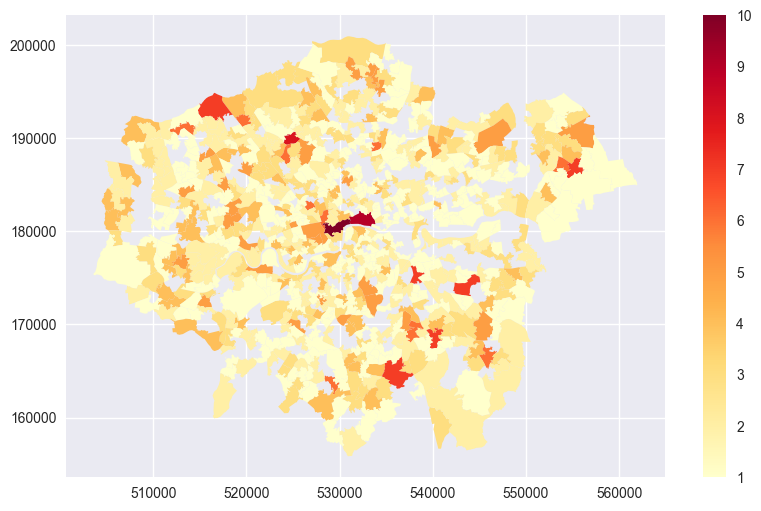

In [75]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(111)
modeling_res.plot(ax=ax, column='Accident_Number', legend=True, cmap='YlOrRd')

In [76]:
X_vars_with_coords= std_gsv + ['x_coord','y_coord']
# X_vars_coord = [X_vars+['x_coord','y_coord']]
y_vars = ['Accident_Num']

In [77]:
X = modeling_res[X_vars_with_coords]
X

std_Person  std_Bike  std_HeavyV  std_LightV  std_Facade  \
0      3.637694  2.485143   -0.180542   -0.393680    1.713005   
1     -0.292511 -0.135954   -0.180542    1.051231    0.391170   
2     -0.292511 -0.135954   -0.180542    2.434657   -0.572202   
3     -0.292511 -0.135954   -0.180542    0.221176   -0.504990   
4     -0.292511 -0.135954   -0.180542   -0.055509   -0.101718   
..          ...       ...         ...         ...         ...   
734   -0.292511 -0.135954   -0.180542    2.711343    0.099918   
735   -0.292511 -0.135954   -0.180542   -0.239966   -0.504990   
736   -0.292511 -0.135954   -0.180542   -0.747222   -0.841050   
737   -0.292511 -0.135954   -0.180542    0.497861   -0.404172   
738   -0.292511 -0.135954   -0.180542    0.497861   -1.714806   

     std_WindowOpening  std_Road  std_Sidewalk  std_StreetFurniture  \
0             0.592408 -0.531271      1.163916             0.418345   
1            -0.174069  0.110912     -0.278435             0.146395   
2            -0.174069  0.640712     -0.999611            -0.669454   
3            -0.174069  1.218677     -0.999611             0.554320   
4            -0.174069  1.363168     -0.518827            -0.669454   
..                 ...       ...           ...                  ...   
734          -0.174069  0.207239     -1.240003            -0.669454   
735          -0.174069  0.785204     -0.759219             0.146395   
736          -0.174069 -0.298480      0.803328            -0.057567   
737          -0.174069 -0.298480     -0.518827             1.166207   
738          -0.174069  0.785204     -1.240003            -0.669454   

     std_GreeneryTree  std_GreeneryGrass   std_Sky  std_Nature        x_coord  \
0           -0.909286          -0.752490 -1.515205   -0.129457  532482.703937   
1           -0.826680          -0.439926  0.659473   -0.129457  548454.924883   
2           -0.964357          -0.596208  1.700117   -0.129457  549648.733906   
3           -0.386113          -0.361785  0.979671   -0.129457  548139.579655   
4           -1.046963          -0.830631  1.339894   -0.129457  546964.944617   
..                ...                ...       ...         ...            ...   
734         -1.046963          -0.830631  1.219820   -0.129457  542803.309176   
735         -0.028153          -0.596208  0.859597   -0.129457  542273.781386   
736         -0.262204           0.341483  1.459969   -0.129457  540690.486531   
737         -0.923054          -0.478996  1.520006   -0.129457  539747.826321   
738          2.422498           0.575906 -0.701368   -0.129457  538621.281201   

           y_coord  
0    181269.309933  
1    188400.149798  
2    186561.029561  
3    185911.093844  
4    185757.090779  
..             ...  
734  187767.637440  
735  189351.093330  
736  175178.488684  
737  179078.897542  
738  177152.207124  

[739 rows x 15 columns]

In [79]:
y= modeling_res['Accident_Number']
y.sort_values()

369     1
441     1
439     1
435     1
433     1
       ..
306     7
247     7
35      8
0       9
710    10
Name: Accident_Number, Length: 739, dtype: int64

In [80]:
X.corr()

std_Person  std_Bike  std_HeavyV  std_LightV  std_Facade  \
std_Person             1.000000  0.326748    0.002395    0.032423    0.320927   
std_Bike               0.326748  1.000000   -0.000372   -0.013061    0.179977   
std_HeavyV             0.002395 -0.000372    1.000000   -0.037778   -0.028709   
std_LightV             0.032423 -0.013061   -0.037778    1.000000    0.263956   
std_Facade             0.320927  0.179977   -0.028709    0.263956    1.000000   
std_WindowOpening      0.043087 -0.017389   -0.023239    0.001914    0.161577   
std_Road              -0.141704 -0.051001    0.087670   -0.216133   -0.285084   
std_Sidewalk           0.257431  0.091927   -0.060684   -0.215248    0.407409   
std_StreetFurniture    0.169498  0.001619    0.157982   -0.049403    0.118140   
std_GreeneryTree      -0.174898 -0.102491   -0.027233   -0.203858   -0.678387   
std_GreeneryGrass     -0.215249 -0.086159   -0.067202   -0.172181   -0.493277   
std_Sky               -0.255714 -0.133023    0.022222   -0.123794   -0.522821   
std_Nature            -0.021518 -0.023353   -0.024164   -0.053817   -0.093493   
x_coord               -0.041241 -0.022937    0.043764   -0.076494    0.021246   
y_coord               -0.007183 -0.005772   -0.051471    0.079709    0.053954   

                     std_WindowOpening  std_Road  std_Sidewalk  \
std_Person                    0.043087 -0.141704      0.257431   
std_Bike                     -0.017389 -0.051001      0.091927   
std_HeavyV                   -0.023239  0.087670     -0.060684   
std_LightV                    0.001914 -0.216133     -0.215248   
std_Facade                    0.161577 -0.285084      0.407409   
std_WindowOpening             1.000000 -0.202300      0.168431   
std_Road                     -0.202300  1.000000     -0.344746   
std_Sidewalk                  0.168431 -0.344746      1.000000   
std_StreetFurniture           0.011674  0.071222      0.194398   
std_GreeneryTree             -0.080741 -0.151266     -0.134934   
std_GreeneryGrass            -0.069040 -0.249508     -0.278427   
std_Sky                      -0.092688  0.427653     -0.421953   
std_Nature                   -0.026638 -0.049784     -0.028380   
x_coord                      -0.009052 -0.009294     -0.037567   
y_coord                       0.010356  0.002339     -0.004314   

                     std_StreetFurniture  std_GreeneryTree  std_GreeneryGrass  \
std_Person                      0.169498         -0.174898          -0.215249   
std_Bike                        0.001619         -0.102491          -0.086159   
std_HeavyV                      0.157982         -0.027233          -0.067202   
std_LightV                     -0.049403         -0.203858          -0.172181   
std_Facade                      0.118140         -0.678387          -0.493277   
std_WindowOpening               0.011674         -0.080741          -0.069040   
std_Road                        0.071222         -0.151266          -0.249508   
std_Sidewalk                    0.194398         -0.134934          -0.278427   
std_StreetFurniture             1.000000         -0.179950          -0.263088   
std_GreeneryTree               -0.179950          1.000000           0.416266   
std_GreeneryGrass              -0.263088          0.416266           1.000000   
std_Sky                        -0.030764         -0.212389           0.182661   
std_Nature                      0.007834          0.089299           0.016389   
x_coord                         0.014551         -0.085053           0.056151   
y_coord                         0.043317         -0.127105           0.004730   

                      std_Sky  std_Nature   x_coord   y_coord  
std_Person          -0.255714   -0.021518 -0.041241 -0.007183  
std_Bike            -0.133023   -0.023353 -0.022937 -0.005772  
std_HeavyV           0.022222   -0.024164  0.043764 -0.051471  
std_LightV          -0.123794   -0.053817 -0.076494  0.079709  
std_Facade          -0.522821   -0.093493  0.02124

In [81]:
import seaborn as sns
plt.style.use("seaborn")

import warnings

warnings.filterwarnings('ignore')
def plot_index_distribution(df, column, xlabel):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    sns.kdeplot(data=df[column], shade=True, color='b', ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel("probability")

    plt.title(f"Probability distribution of {xlabel} based on station")

    plt.show()



def plot_index_displot(df, column, xlabel):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    sns.displot(data=df[column], ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel("probability")

    plt.title(f"Probability distribution of {xlabel} based on station")

    plt.show()


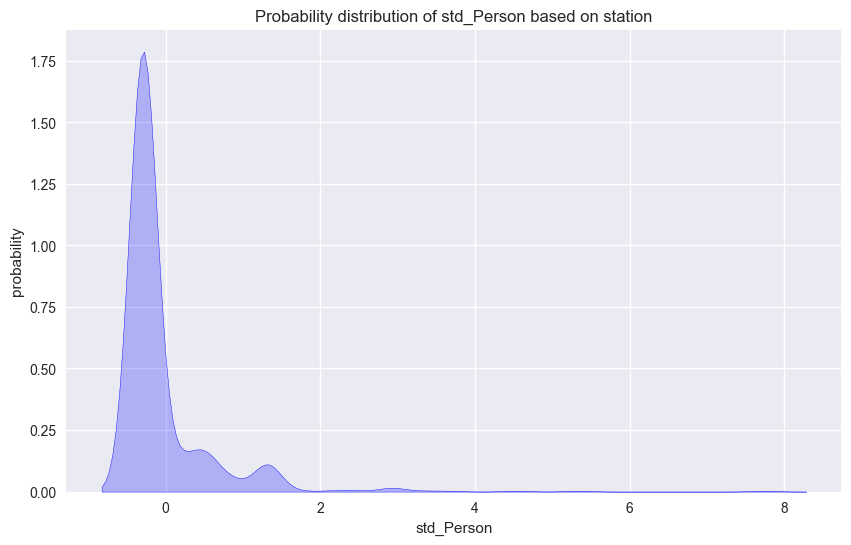

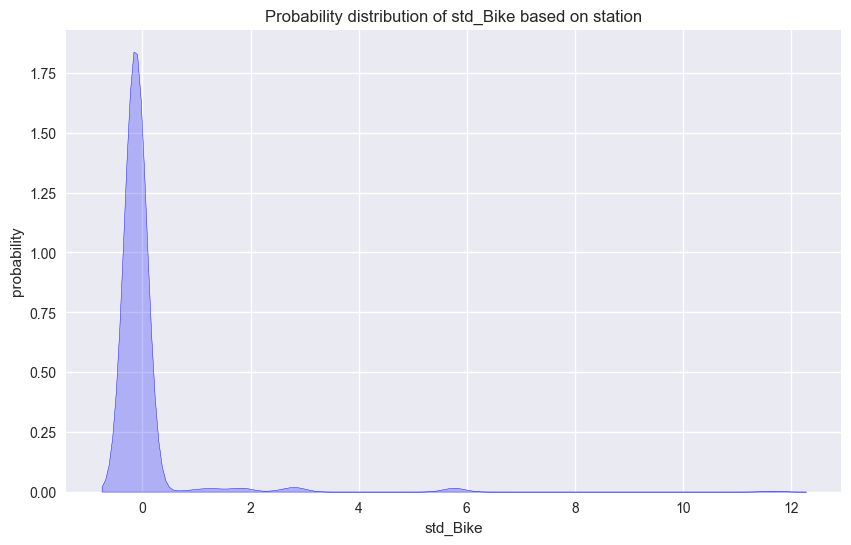

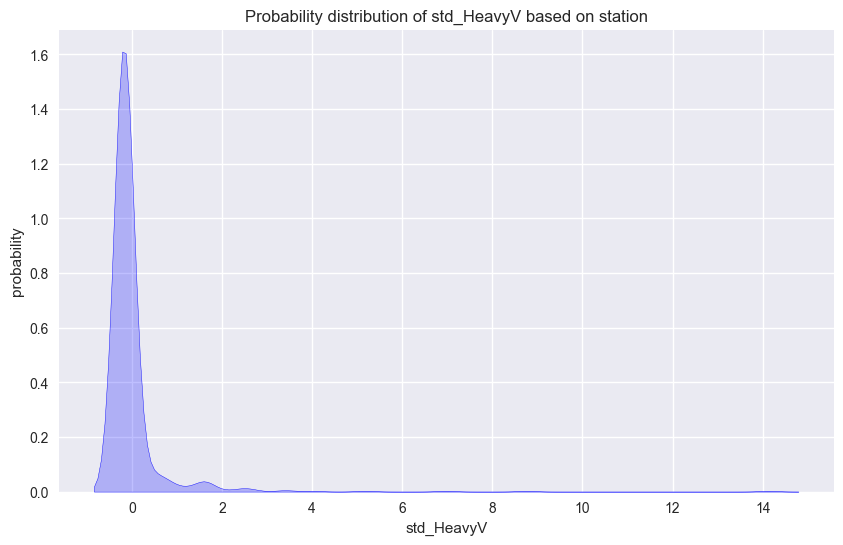

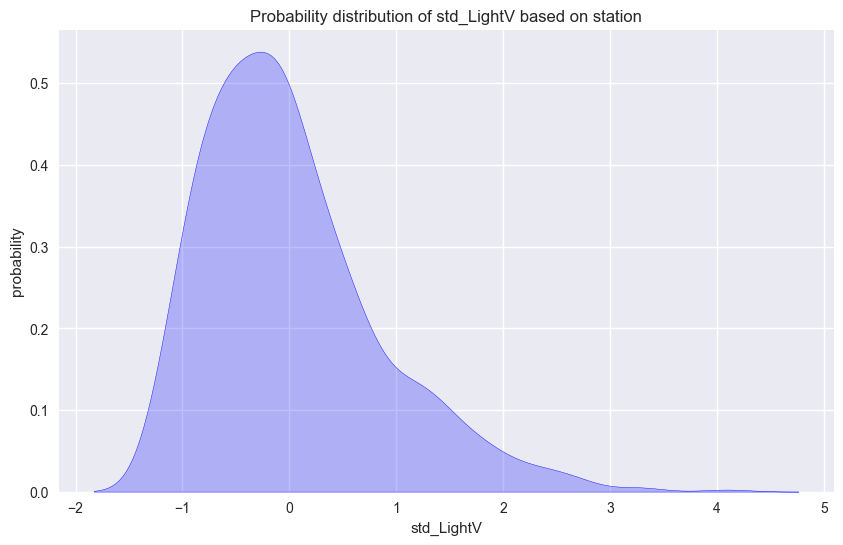

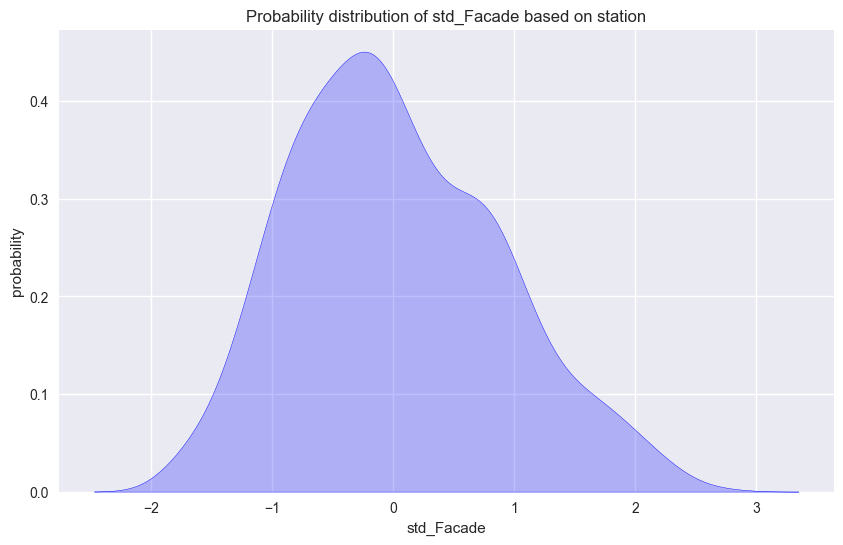

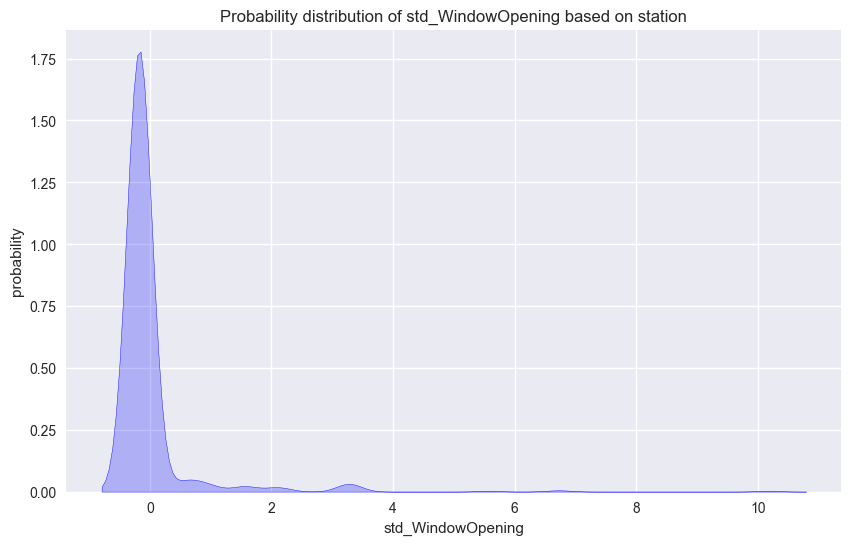

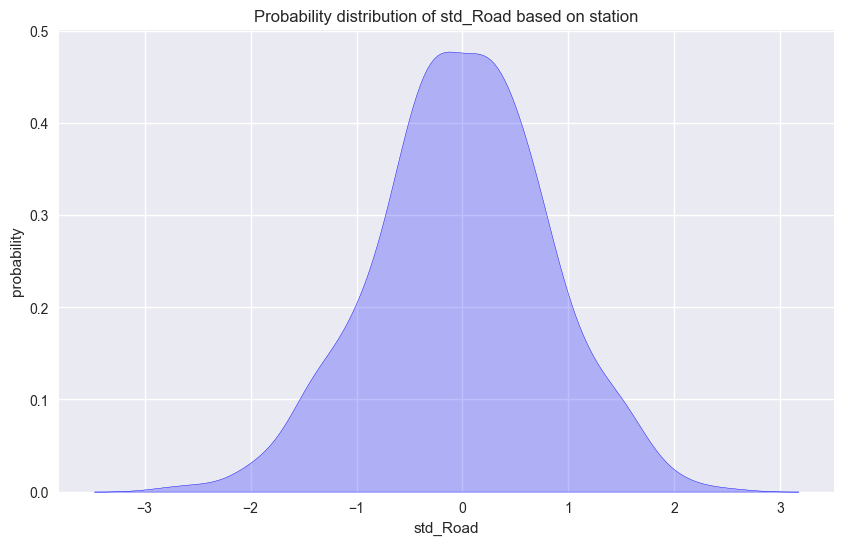

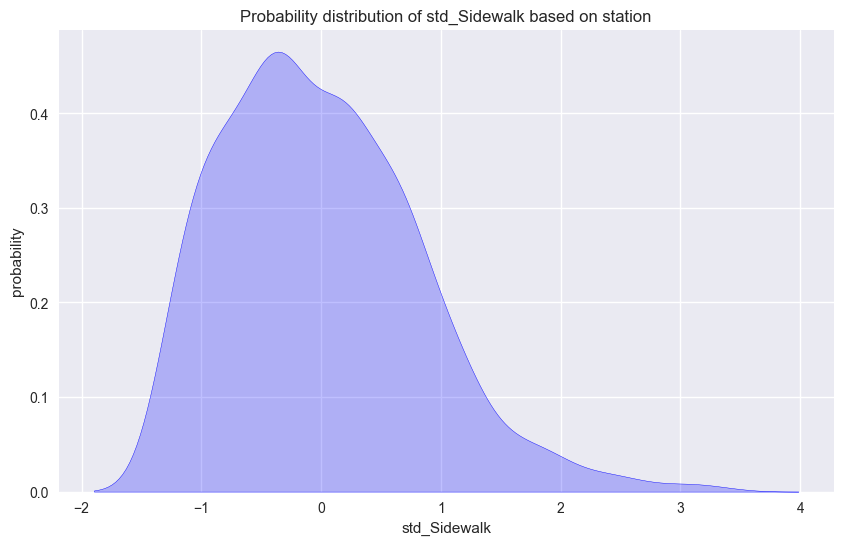

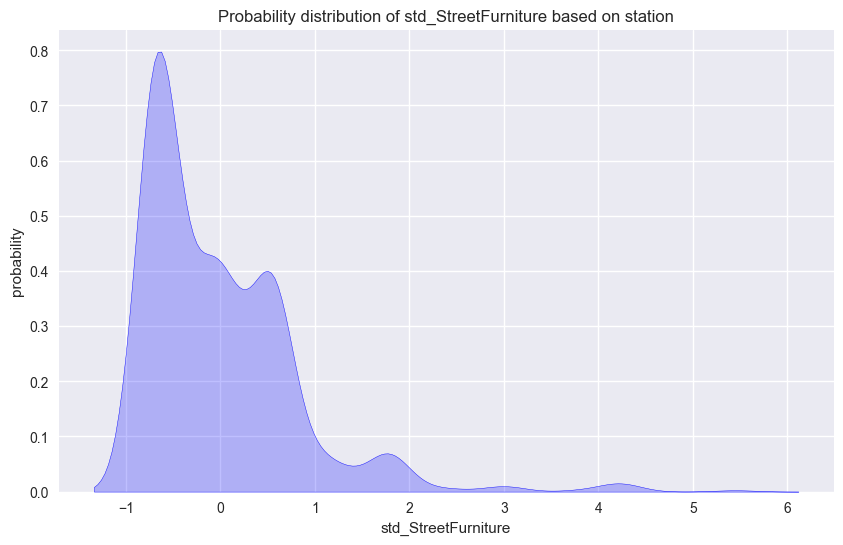

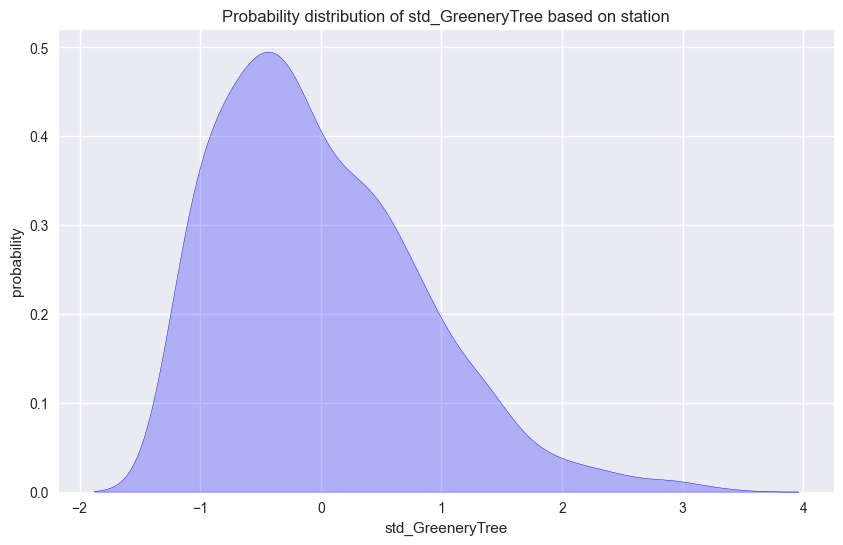

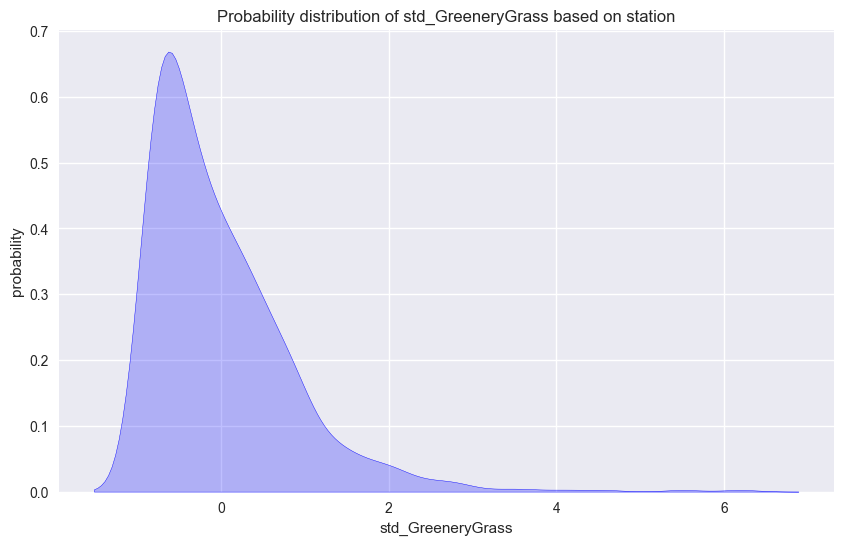

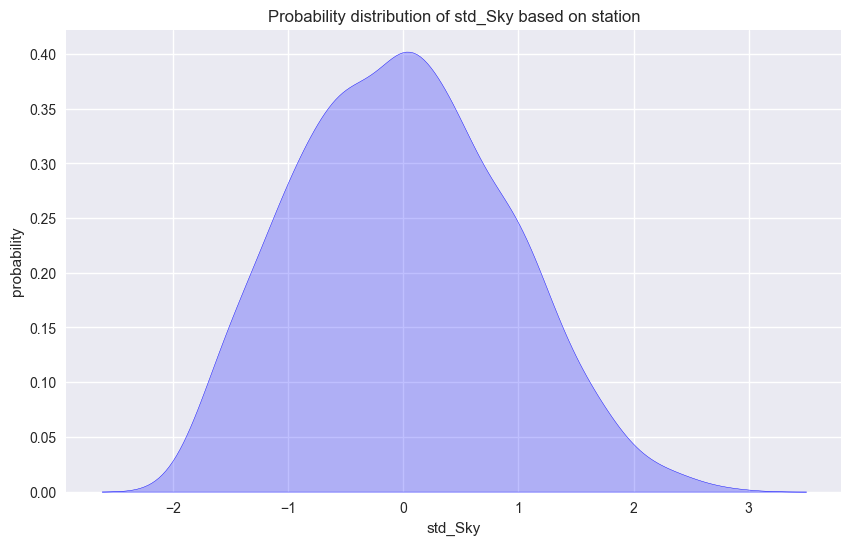

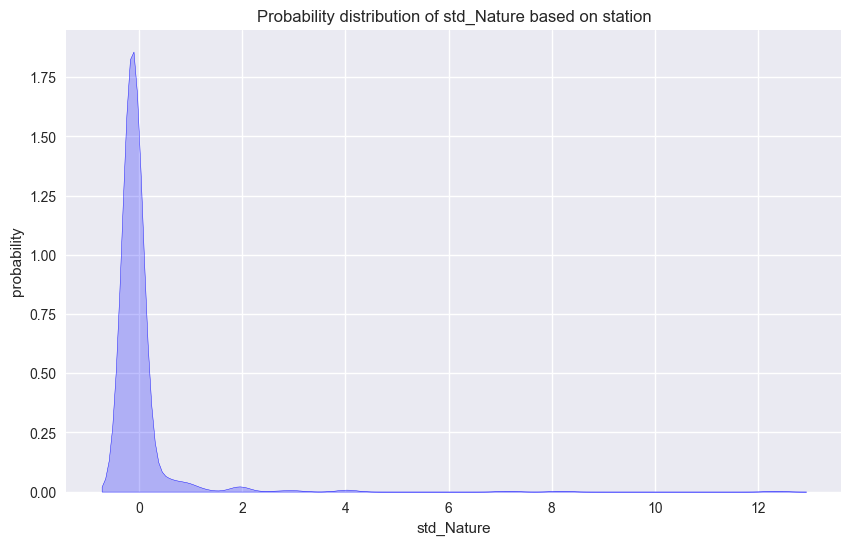

In [82]:
for index in X.columns.tolist()[:-2]:
    plot_index_distribution(X, index, index)

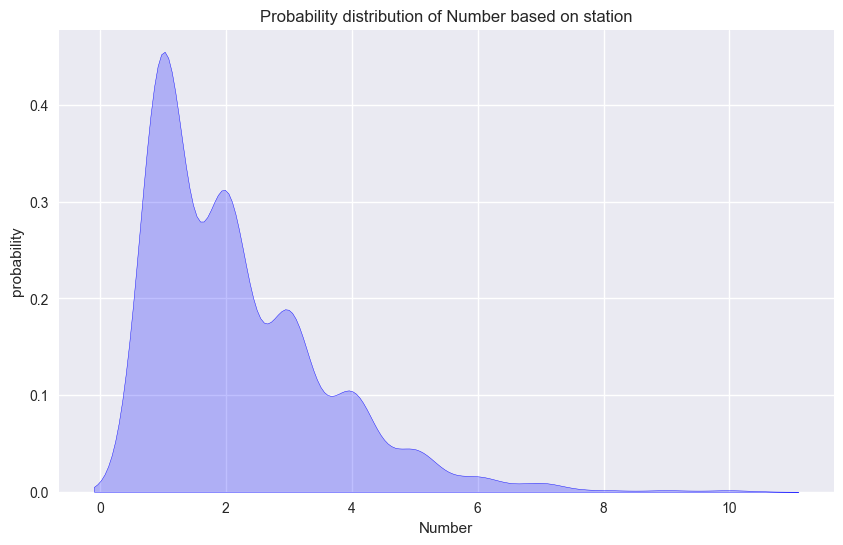

In [83]:
plot_index_distribution(modeling_res,'Accident_Number','Number')

In [84]:
import xgboost
import shap
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=222)

In [86]:
import warnings

warnings.filterwarnings('ignore')

In [87]:
%%time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import numpy as np
# Choose hyperparameter domain to search over
space = {
    'max_depth':
    hp.choice('max_depth', np.arange(1, 30, 1, dtype=int)),
    'colsample_bytree':
    hp.quniform('colsample_bytree', 0.3, 1.01, 0.05),
    'min_child_weight':
    hp.choice('min_child_weight', np.arange(1, 30, 1, dtype=int)),
    'subsample':
    hp.quniform('subsample', 0.3, 1.01, 0.05),
    'learning_rate':
    hp.choice('learning_rate', np.arange(0.05, 1.01, 0.05)),
    'gamma':
    hp.quniform('gamma', 0.1, 5, 0.05),
    'objective':
    'reg:squarederror',
    'eval_metric':
    'rmse',
}


def score(params, n_folds=5):

    #Cross-validation
    d_train = xgboost.DMatrix(X, y)

    cv_results = xgboost.cv(params,
                            d_train,
                            nfold=n_folds,
                            num_boost_round=100,
                            early_stopping_rounds=10,
                            metrics='rmse',
                            seed=0)

    loss = min(cv_results['test-rmse-mean'])

    return loss


def optimize(trials, space):

    best = fmin(score,
                space,
                algo=tpe.suggest,
                max_evals=500,
                rstate=np.random.default_rng(333))  #Add seed to fmin function
    return best


trials = Trials()
best_params = optimize(trials, space)

# Return the best parameters
best_params = space_eval(space, best_params)

best_params

100%|██████████| 500/500 [02:48<00:00,  2.96trial/s, best loss: 0.8105739084548095]
Wall time: 2min 48s


{'colsample_bytree': 0.30000000000000004,
 'eval_metric': 'rmse',
 'gamma': 1.2000000000000002,
 'learning_rate': 0.05,
 'max_depth': 9,
 'min_child_weight': 2,
 'objective': 'reg:squarederror',
 'subsample': 0.9}

In [88]:
data_test = xgboost.DMatrix(X_test, y_test)

data = xgboost.DMatrix(X_train, y_train)
final_model = xgboost.train(best_params,
                            data,
                            num_boost_round=500,
                            verbose_eval=False,
                            evals=[(data_test, "Test")],
                            early_stopping_rounds=10)

data_all = xgboost.DMatrix(X)
y_pred = final_model.predict(data_all)
print(np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

0.5183887707131537
0.856217166296218


In [89]:
explainer_shap = shap.TreeExplainer(final_model)
shap_values = explainer_shap(X)

In [90]:
shap_interaction_values = shap.TreeExplainer(
    final_model).shap_interaction_values(X)

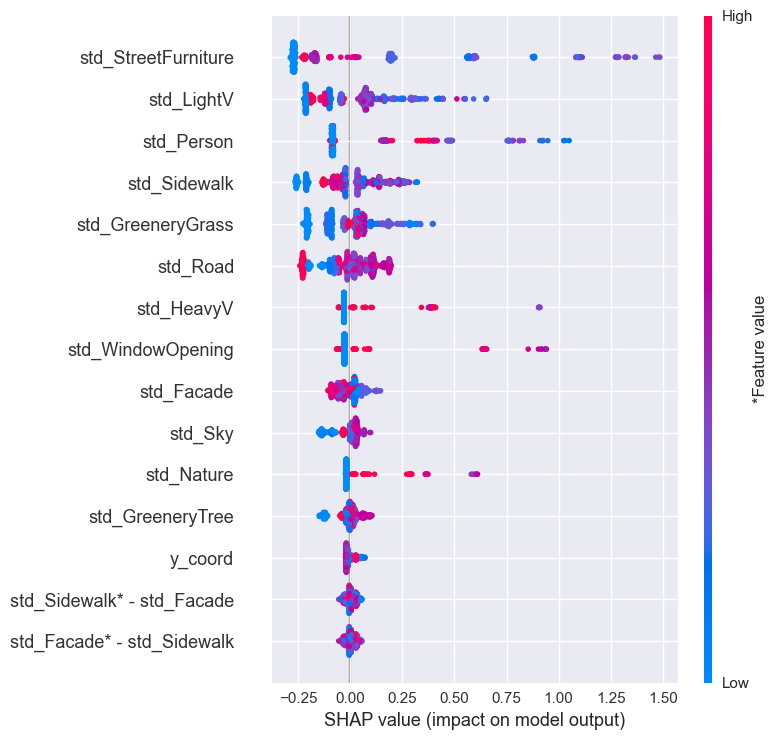

In [91]:
X_names = X.columns.tolist()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

shap.summary_plot(shap_interaction_values,
                  X,
                  max_display=15,
                  feature_names=X_names,
                  plot_type="compact_dot")

In [70]:
from tqdm import tqdm

shap_bootstrap_list = []


def boostrap_shap(y_pred):
    n = y.shape[0]
    err = y - y_pred

    for i in tqdm(range(500)):

        random_sample_index = np.random.choice(np.arange(n),
                                               size=n,
                                               replace=True)

        y_sample = y_pred + err[random_sample_index]

        sample_data = xgboost.DMatrix(X, y_sample)

        sample_model = xgboost.train(best_params,
                                     sample_data,
                                     num_boost_round=500,
                                     verbose_eval=False,
                                     evals=[(data_test, "Test")],
                                     early_stopping_rounds=10)

        explainer_shap = shap.Explainer(sample_model)
        shap_values = explainer_shap(X)

        shap_bootstrap_list.append(shap_values.values)

    return np.array(shap_bootstrap_list)

In [71]:
%%time
np.random.seed(333)

shap_bootstrap_list = boostrap_shap(y_pred)

100%|██████████| 500/500 [10:49<00:00,  1.30s/it]

CPU times: user 38min 47s, sys: 2min 22s, total: 41min 10s
Wall time: 10min 49s


In [72]:
l_shap_global = np.abs(shap_bootstrap_list).mean(axis=1).mean(
    axis=0) - np.percentile(
        np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=2.5)

u_shap_global = np.percentile(
    np.abs(shap_bootstrap_list).mean(axis=1), axis=0,
    q=97.5) - np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0)

df_mean_shap = pd.DataFrame(np.vstack([
    np.array(X.columns),
    np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0), l_shap_global,
    u_shap_global,
    np.percentile(np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=2.5),
    np.percentile(np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=97.5)
]).T,
                            columns=[
                                'Feature', 'SHAP', 'SHAP_err_l', 'SHAP_err_u',
                                'SHAP_l', 'SHAP_u'
                            ])

In [73]:
df_mean_shap = df_mean_shap.sort_values(by="SHAP", ascending=True)

df_mean_shap["SHAP"] = df_mean_shap["SHAP"].astype("float")
df_mean_shap["SHAP_err_u"] = df_mean_shap["SHAP_err_u"].astype("float")
df_mean_shap["SHAP_err_l"] = df_mean_shap["SHAP_err_l"].astype("float")

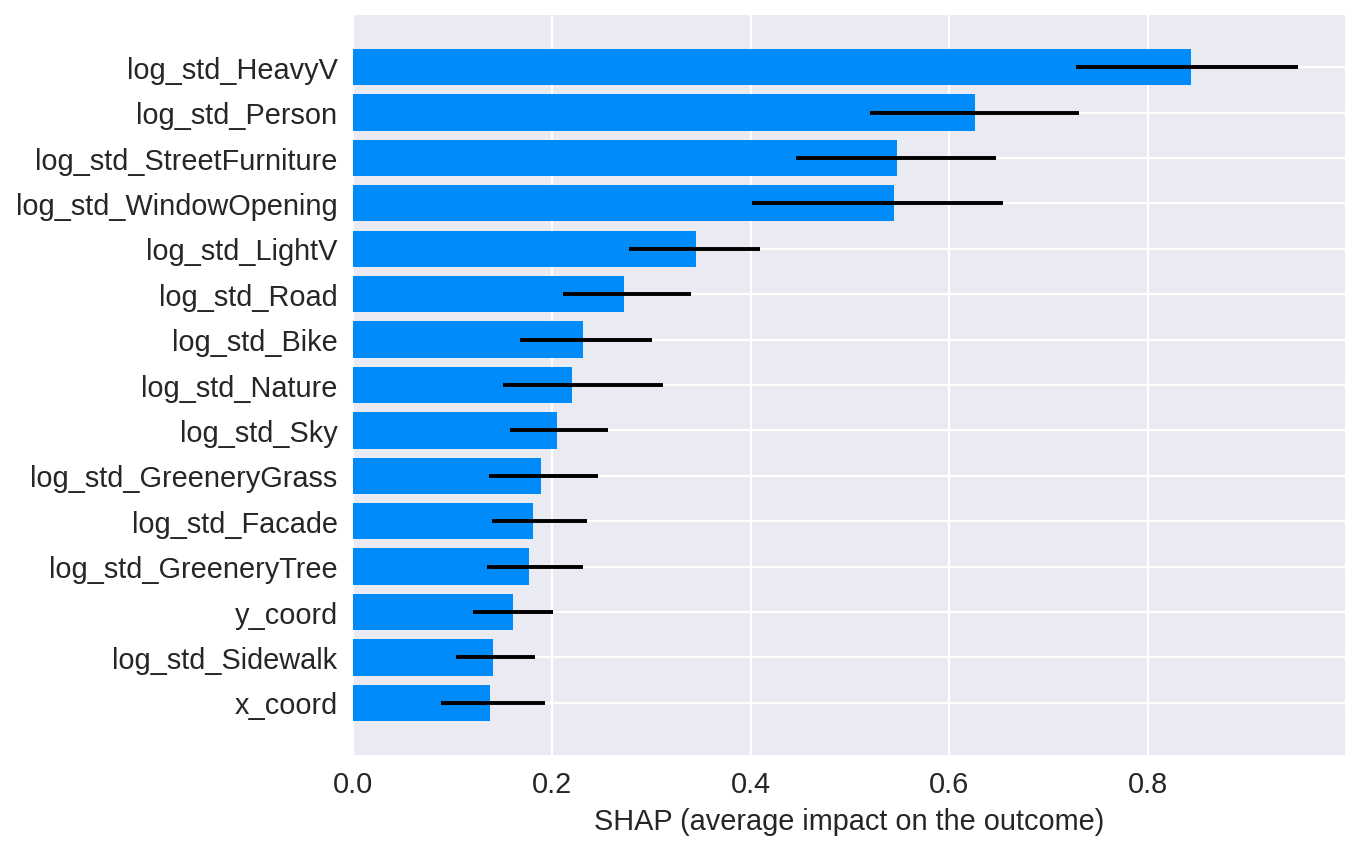

In [74]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6), dpi=160)

ax.barh(df_mean_shap.Feature,
        df_mean_shap.SHAP,
        xerr=df_mean_shap[['SHAP_err_l', 'SHAP_err_u']].values.T,
        color=shap.plots.colors.blue_rgb)

ax.set_xlabel('SHAP (average impact on the outcome)', fontsize=13)
ax.tick_params(labelsize=13)

In [75]:
#Compute the 95% confidence interval
l_95 = np.percentile(shap_bootstrap_list, axis=0, q=2.5)
u_95 = np.percentile(shap_bootstrap_list, axis=0, q=97.5)

In [76]:
import seaborn as sns


def plot(ax, term=0):

    order = np.argsort(X.values[:, term])

    ax.fill_between(X.values[:, term][order],
                    l_95[:, term][order],
                    u_95[:, term][order],
                    color='lightblue',
                    alpha=0.6)

    ax.scatter(X.values[:, term][order],
               shap_bootstrap_list.mean(axis=0)[:, term][order],
               s=10,
               color='black')

    ax.axhline(
        0,
        color='r',
        linestyle='--',
    )
    ax.set_xlabel(X_names[term], fontsize=13)
    #ax.set_ylim(-2.5,2.5)
    ax.set_ylabel("SHAP value", fontsize=13)
    plt.tight_layout()

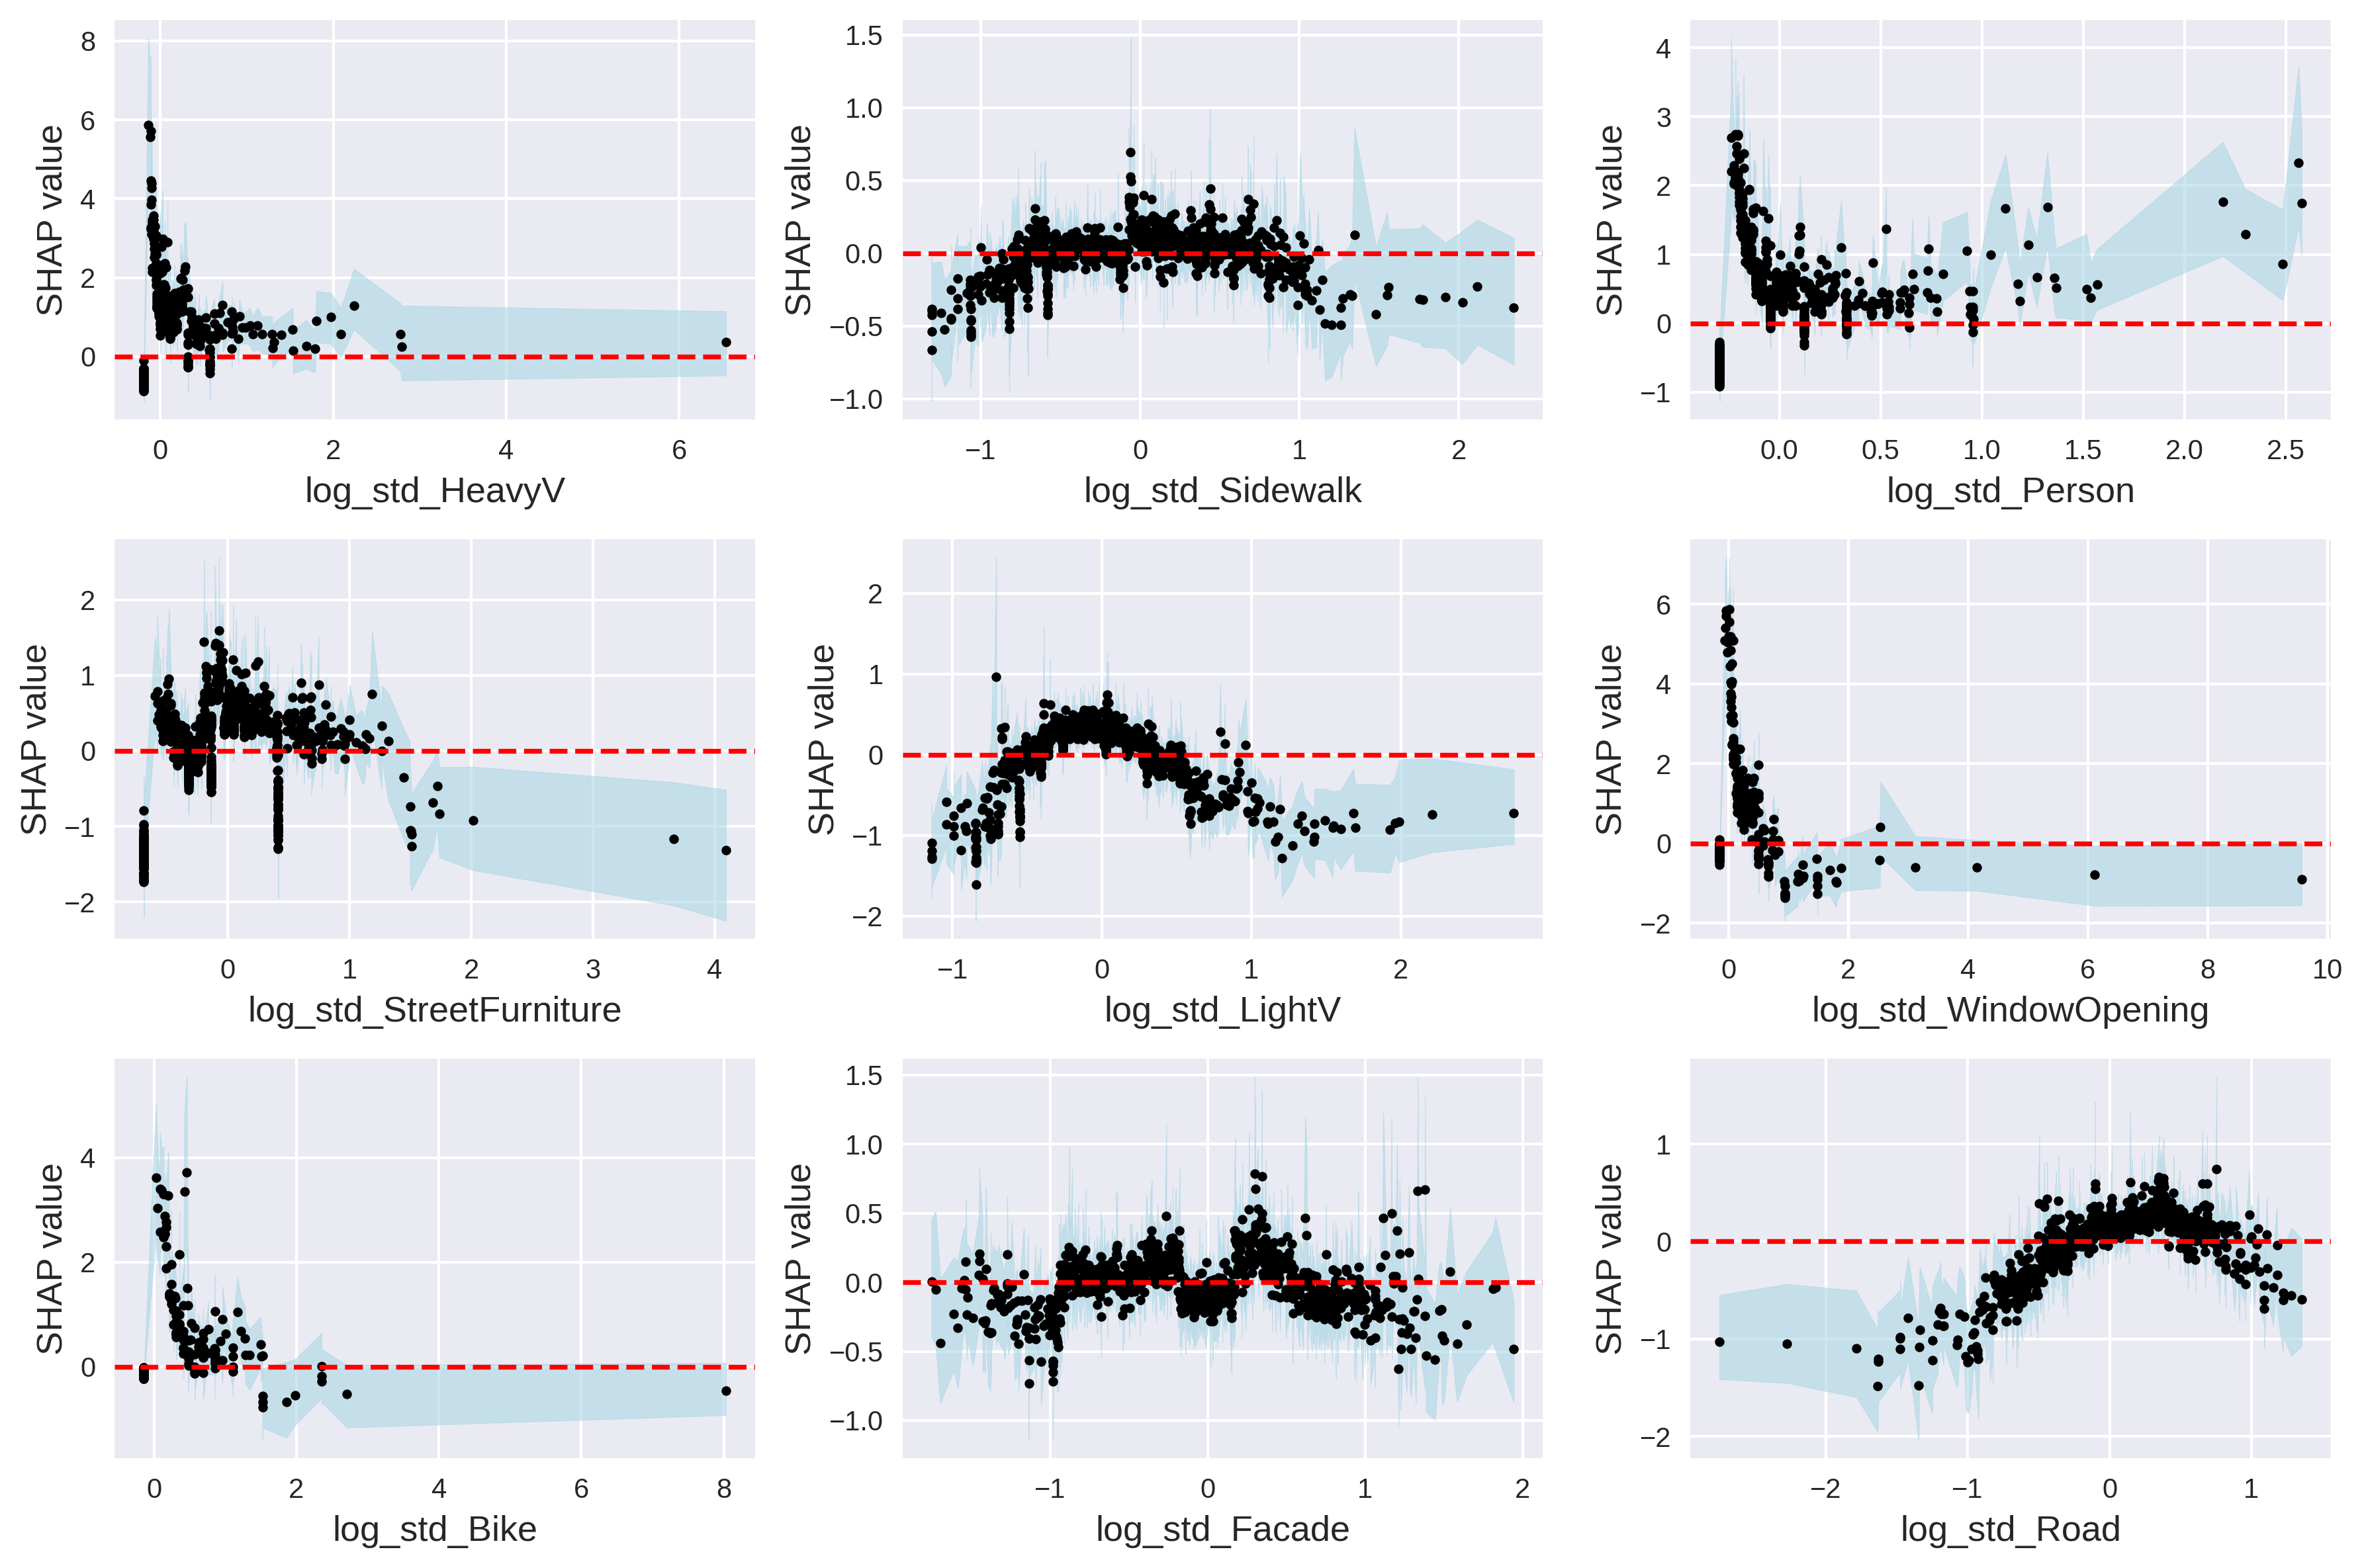

In [77]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8), dpi=300)
ax = ax.ravel()
index = 0
for j in [2, 7, 0, 8, 3, 5, 1, 4, 6]:
    plot(ax=ax[index], term=j)
    index += 1


IndexError: index 9 is out of bounds for axis 0 with size 9

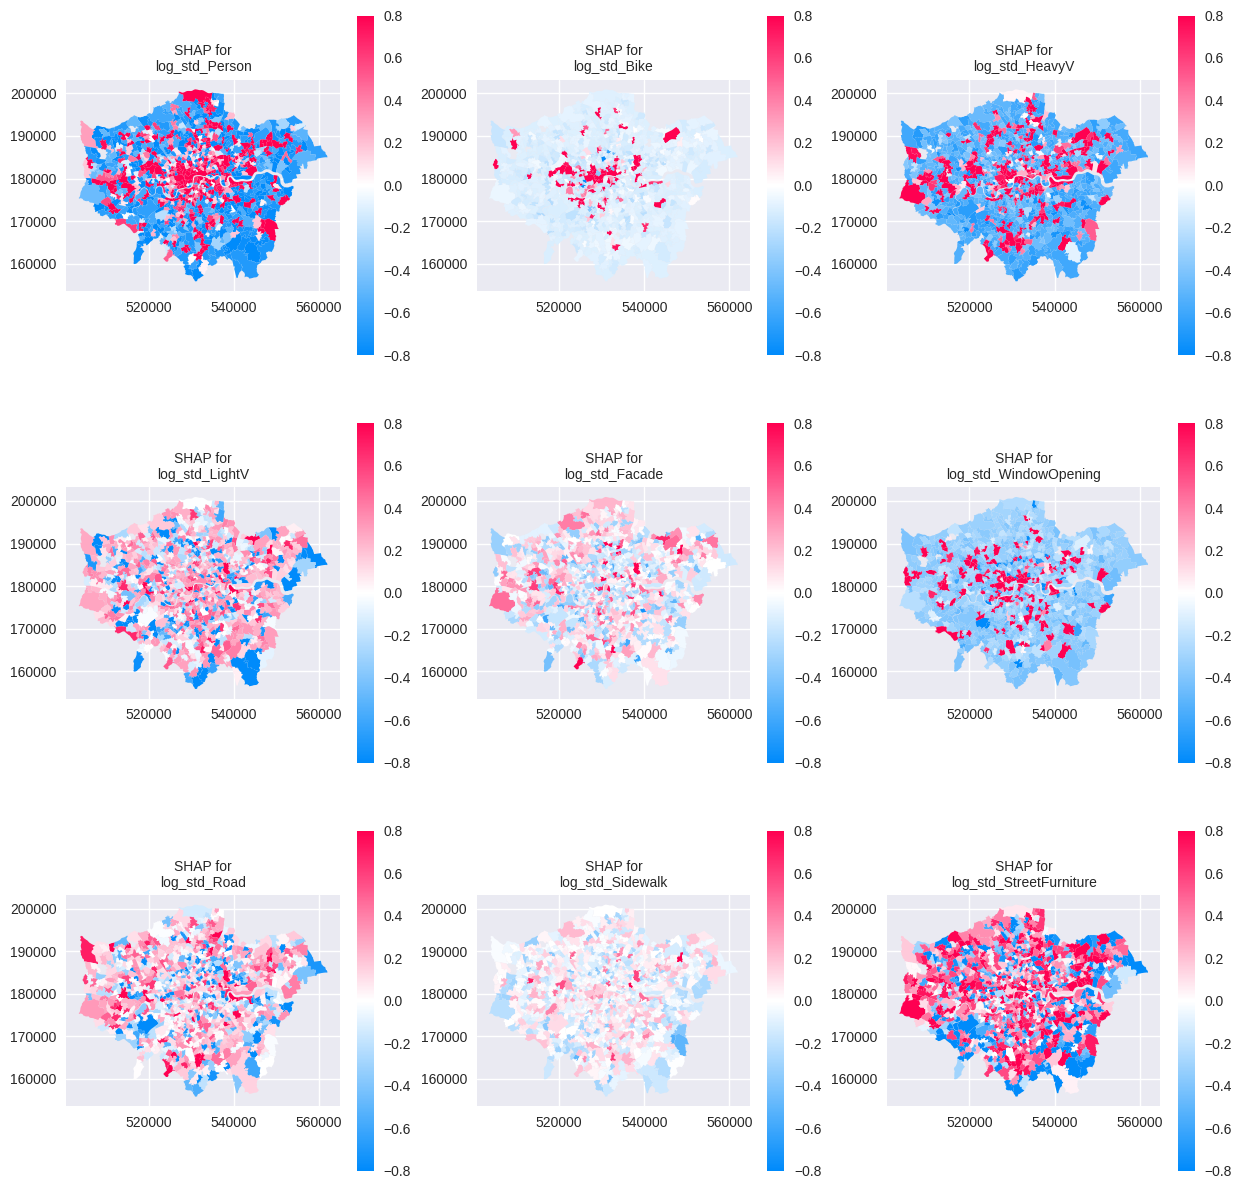

In [79]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for j in range(len(X_vars)-2):
    ax = ax.ravel()
    modeling_res.plot(ax=ax[j],
                 column=shap_values.values[:, j],
                 legend=True,
                 vmin=-0.8,
                 vmax=0.8,
                 cmap=shap.plots.colors.red_white_blue)

    ax[j].set_title("SHAP for\n" + X_vars[j], fontsize=10)

(500655.0629697761, 564875.8129508395, 153596.65737396356, 203187.7494574752)

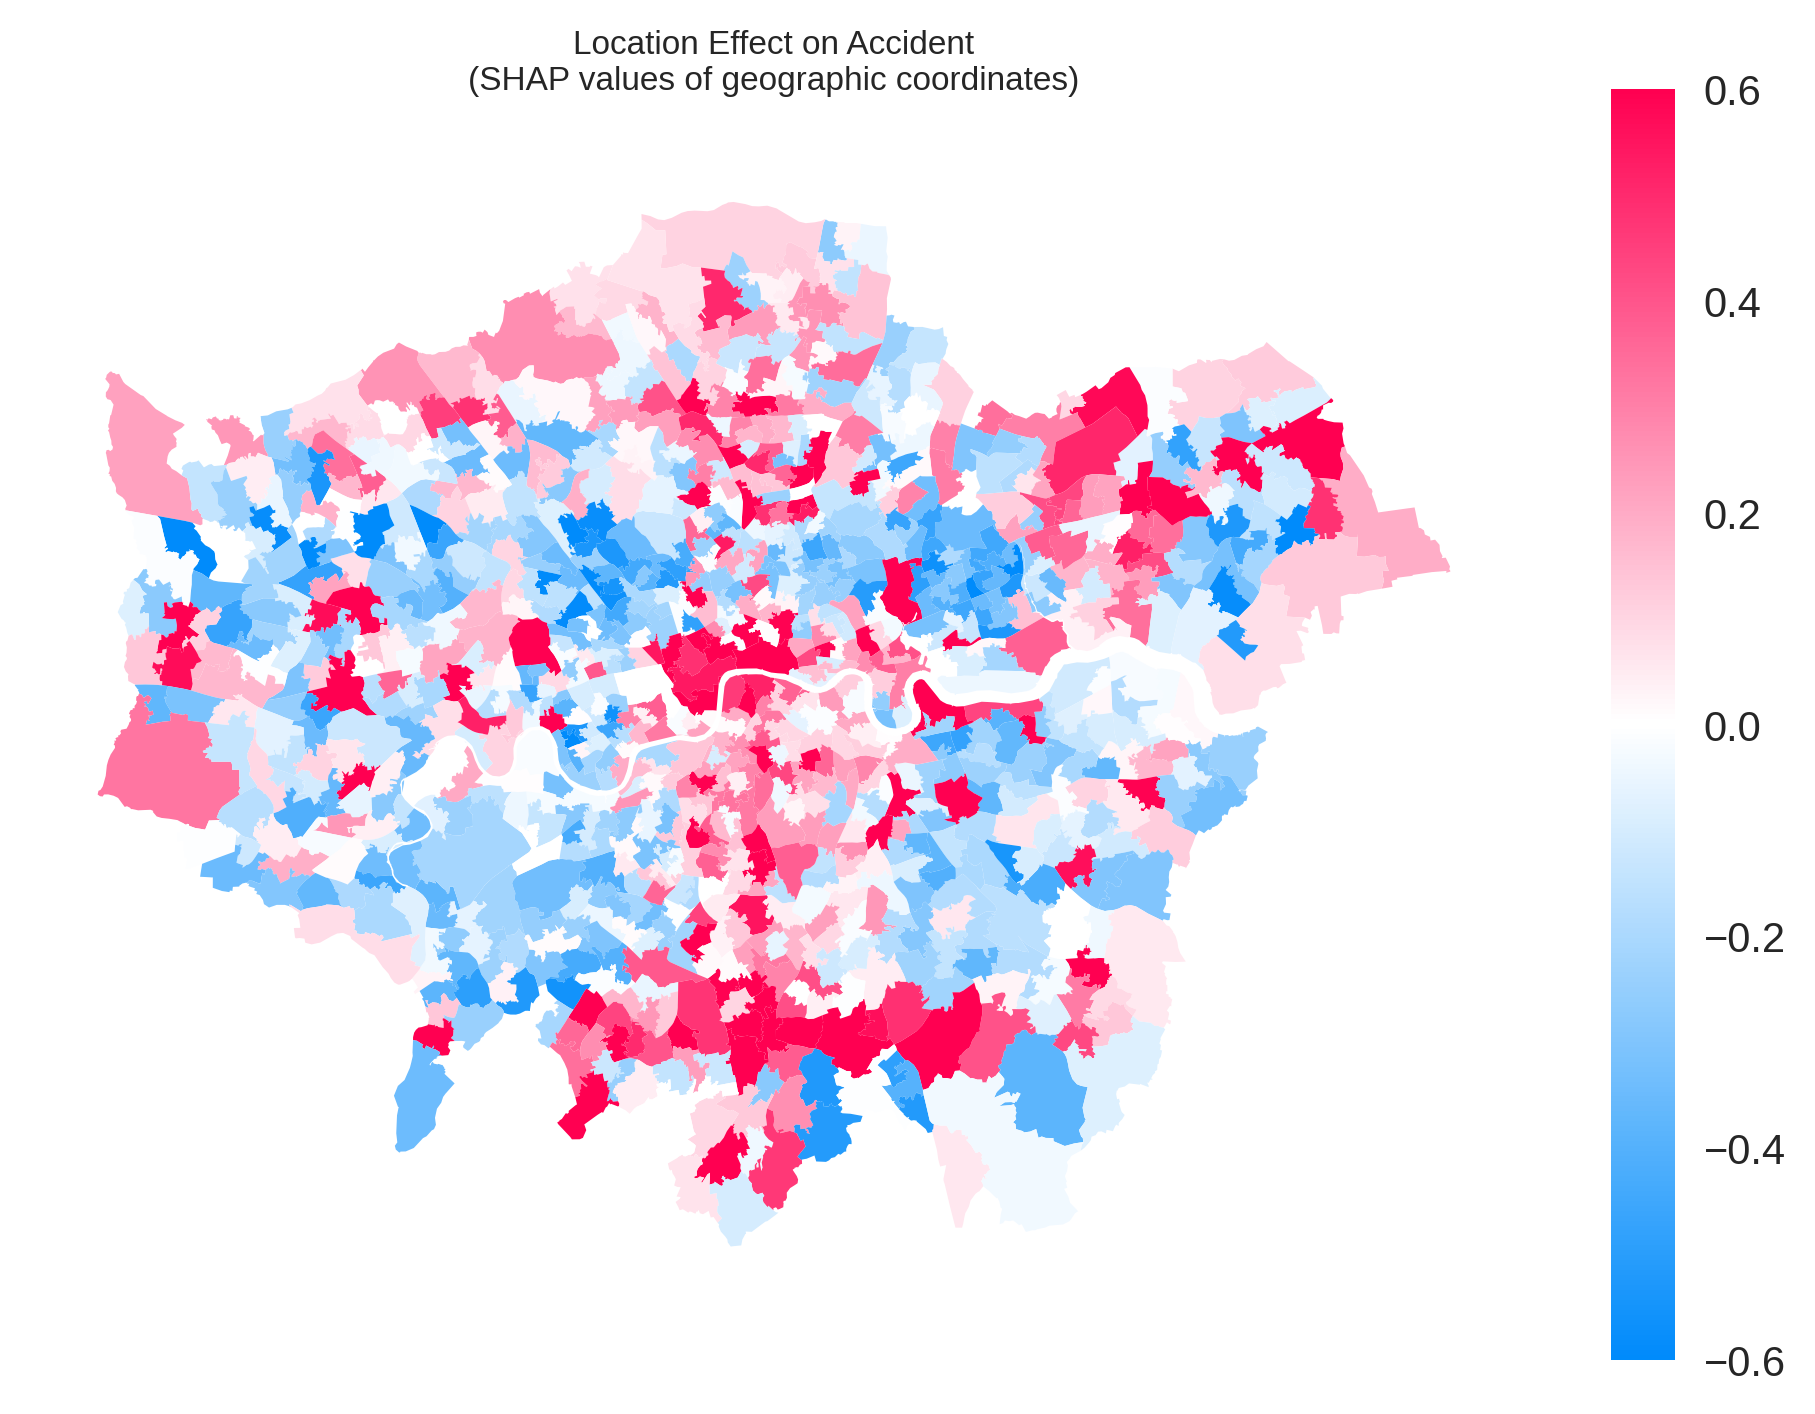

In [80]:
fig, ax = plt.subplots(dpi=300)

modeling_res.plot(ax=ax,
             column=shap_values.values[:, -1] + shap_values.values[:, -2],
             legend=True,
             vmin=-0.6,
             vmax=0.6,
             figsize=(15, 8),
             cmap=shap.plots.colors.red_white_blue)

plt.title(
    "Location Effect on Accident\n(SHAP values of geographic coordinates)\n",
    fontsize=8)

plt.axis('off')

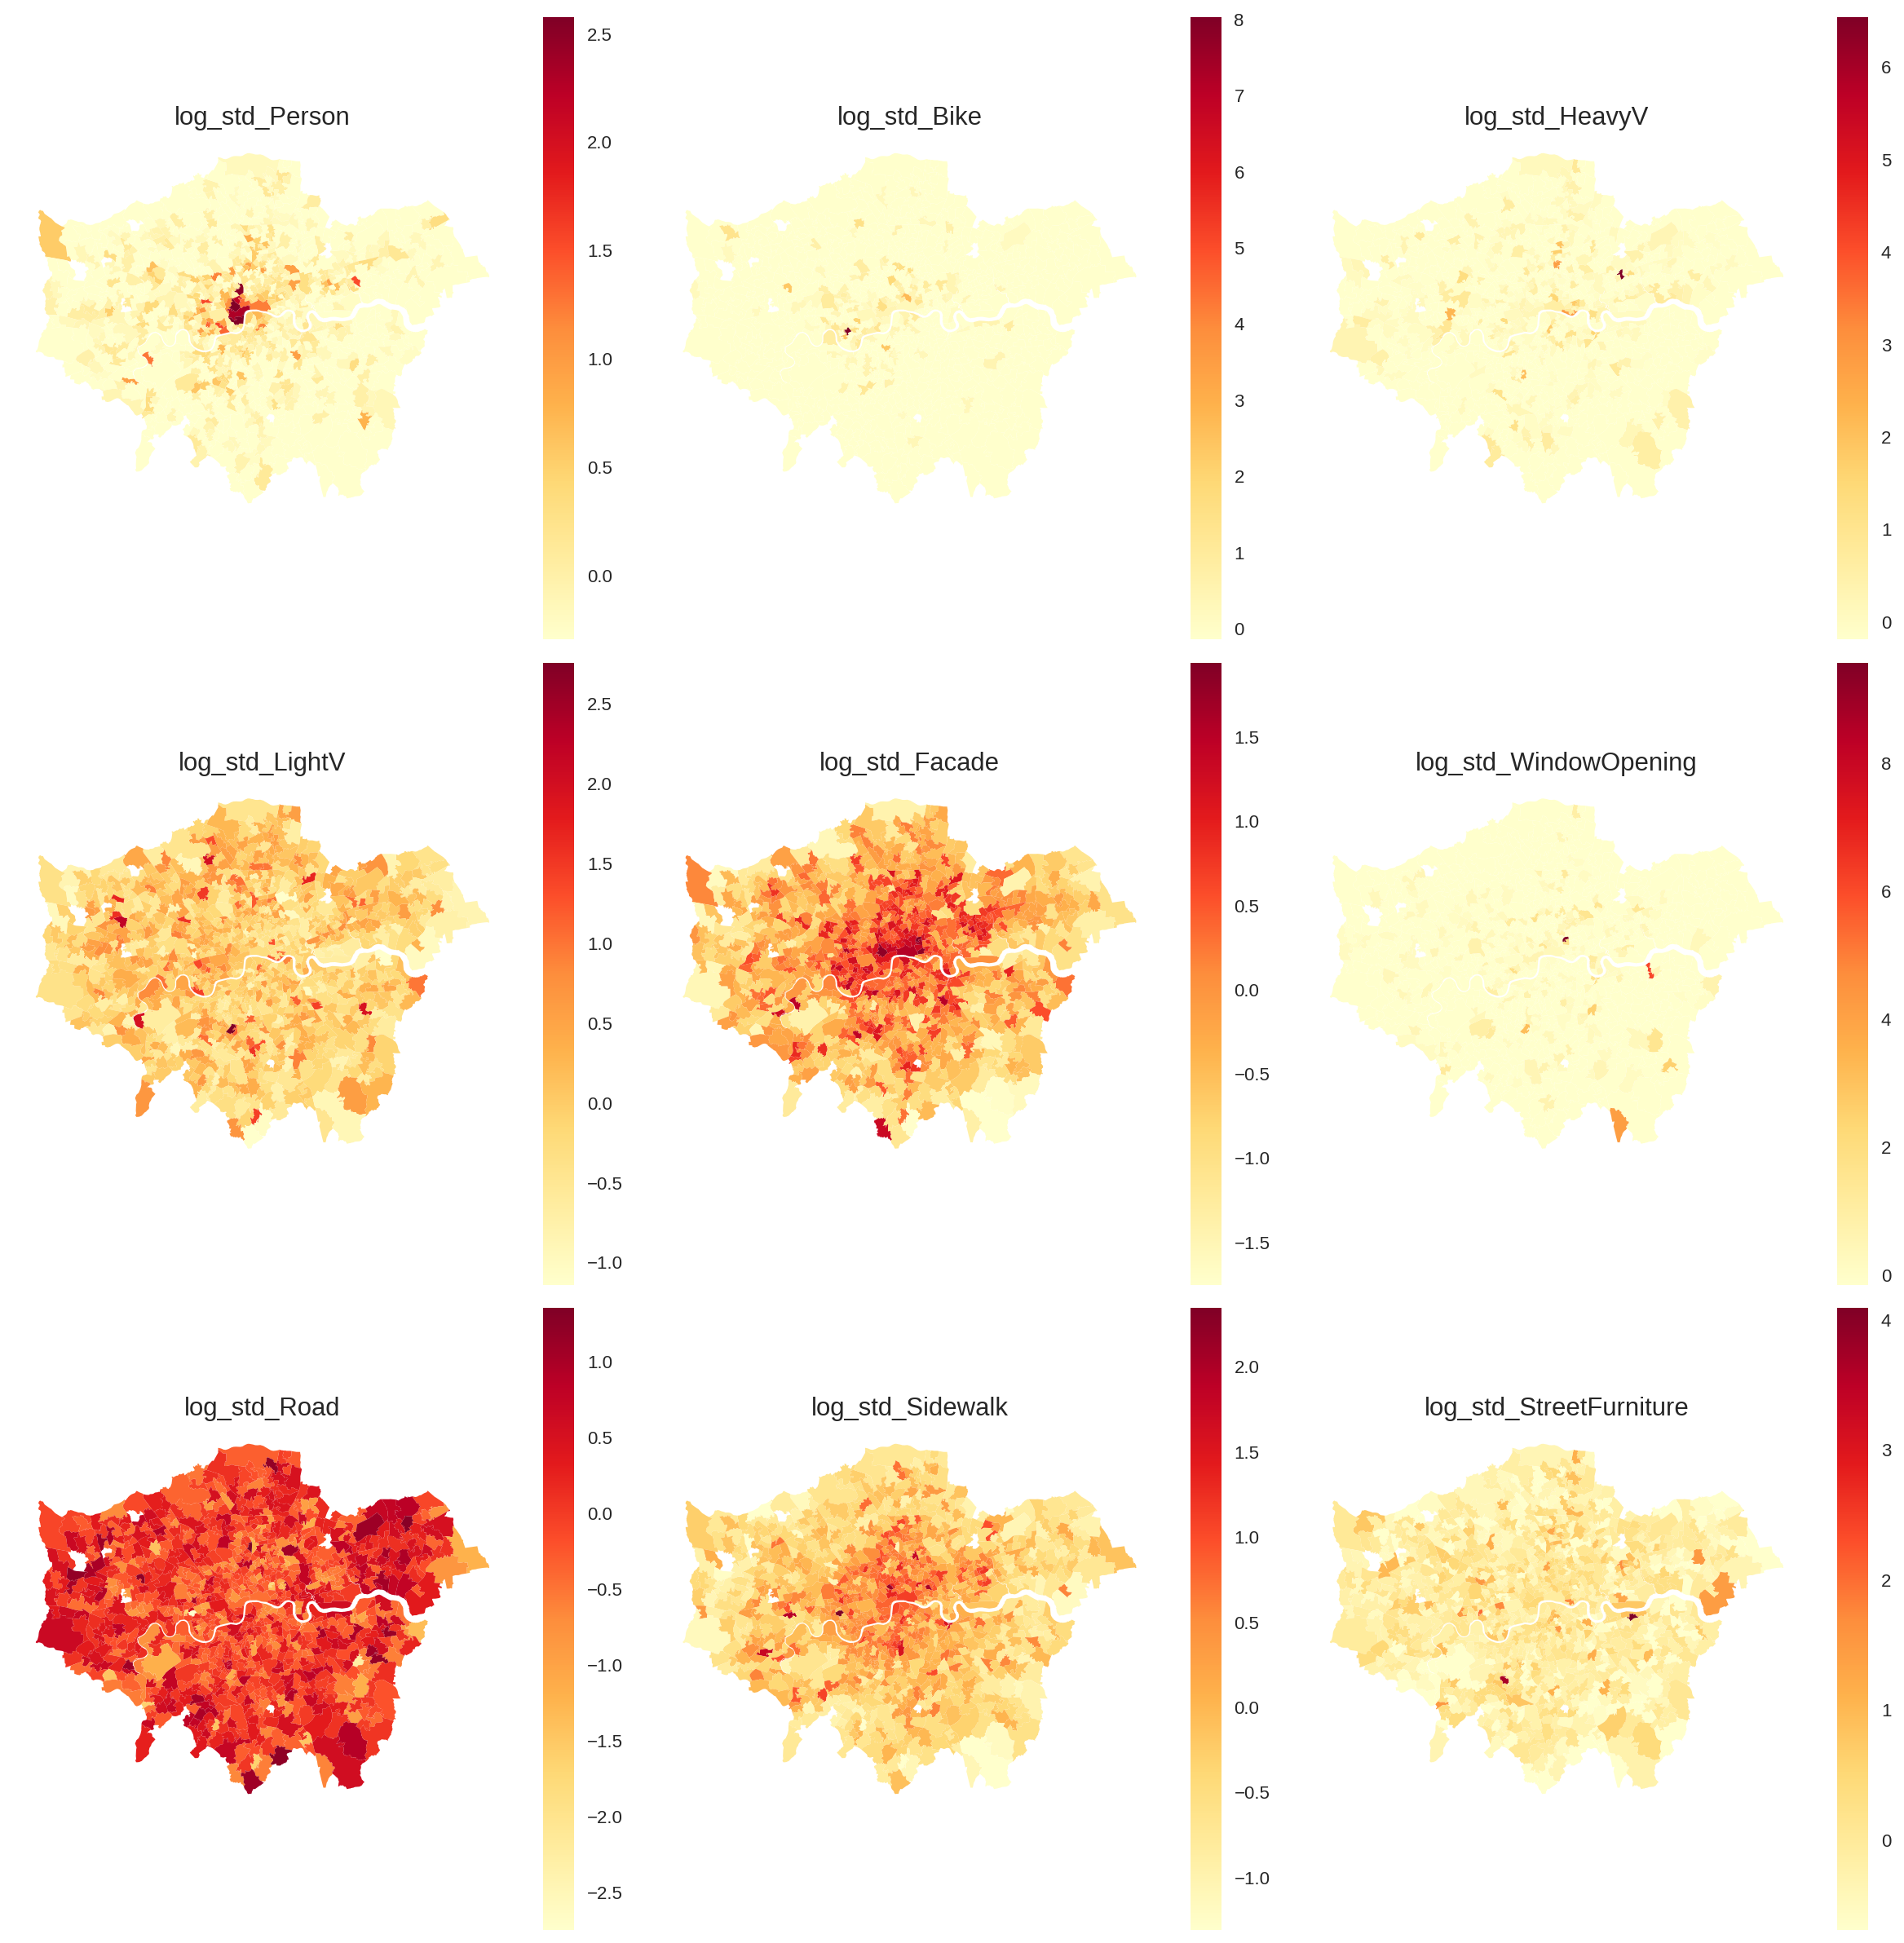

In [81]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), dpi=160)

for j in [2, 7, 0, 8, 3, 5, 1, 4, 6]:
    ax = ax.ravel()

    modeling_res.plot(ax=ax[j],
                      column=shap_values.data[:, j],
                      legend=True,
                      cmap='YlOrRd')

    ax[j].set_title(X_names[j], fontsize=14)
    ax[j].axis('off')

fig.tight_layout()